In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataset Description

The dataset contains forecast of next day's maximum & minimum temperatures and other associated features of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. It can be used to analyse which features affect the next day's maximum and minimum temperatures, also it can be used to predict the same using machine learning algorithms.

In [200]:
df = pd.read_csv("Bias_correction_ucl.csv",parse_dates=["Date"])
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [82]:
df.shape

(7752, 25)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7750 non-null   float64       
 1   Date              7750 non-null   datetime64[ns]
 2   Present_Tmax      7682 non-null   float64       
 3   Present_Tmin      7682 non-null   float64       
 4   LDAPS_RHmin       7677 non-null   float64       
 5   LDAPS_RHmax       7677 non-null   float64       
 6   LDAPS_Tmax_lapse  7677 non-null   float64       
 7   LDAPS_Tmin_lapse  7677 non-null   float64       
 8   LDAPS_WS          7677 non-null   float64       
 9   LDAPS_LH          7677 non-null   float64       
 10  LDAPS_CC1         7677 non-null   float64       
 11  LDAPS_CC2         7677 non-null   float64       
 12  LDAPS_CC3         7677 non-null   float64       
 13  LDAPS_CC4         7677 non-null   float64       
 14  LDAPS_PPT1        7677 n

Let's look at distribution of all the features

In [84]:
df["station"].nunique()

25

In [85]:
df["station"].value_counts()

25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64

The dataset predicts temperatures of 25 stations over 310 days.

In [86]:
df["Date"].nunique()

310

Let's extract all info from Date_Of_Journey for analysis & model

In [87]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0


In [88]:
df["year"].nunique()

5

In [89]:
df["year"].value_counts()

2015.0    1550
2014.0    1550
2013.0    1550
2017.0    1550
2016.0    1550
Name: year, dtype: int64

The observations were taken over a period of 5 years (2013 to 2017).

In [90]:
df["month"].nunique()

3

In [91]:
df["month"].value_counts()

7.0    3875
8.0    3750
6.0     125
Name: month, dtype: int64

Obervations were taken only over the months of June, July & August.

Let's drop the Date column as we have extracted all info from it

In [92]:
df.drop("Date",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float64


Text(0.5, 1.0, 'Present Maximum Temp. - Distplot')

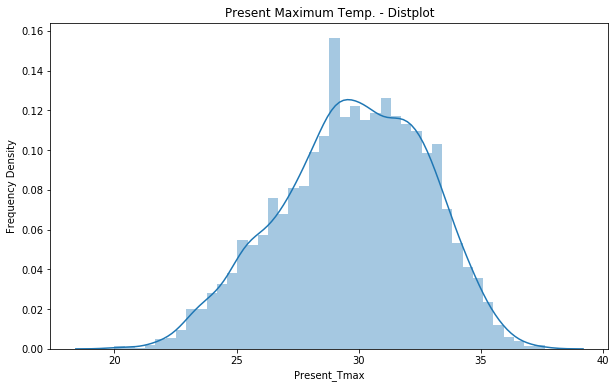

In [93]:
plt.figure(figsize=(10,6))
sns.distplot(df["Present_Tmax"])
#plt.xticks(rotation = 90)
plt.xlabel('Present_Tmax')
plt.ylabel('Frequency Density')
plt.title('Present Maximum Temp. - Distplot')

The distribution of Maximum Present Temp approximates a normal distribution skewed to the left.

Text(0.5, 1.0, 'Present Minimum Temp. - Distplot')

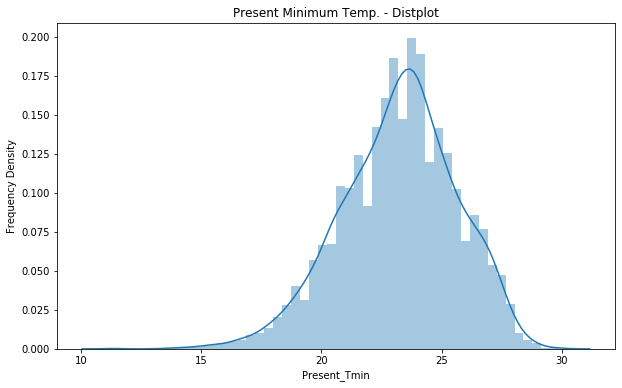

In [94]:
plt.figure(figsize=(10,6))
sns.distplot(df["Present_Tmin"])
#plt.xticks(rotation = 90)
plt.xlabel('Present_Tmin')
plt.ylabel('Frequency Density')
plt.title('Present Minimum Temp. - Distplot')

The distribution of Minimum Present Temp approximates a normal distribution.

Text(0.5, 1.0, 'LDAPS_RHmin - Distplot')

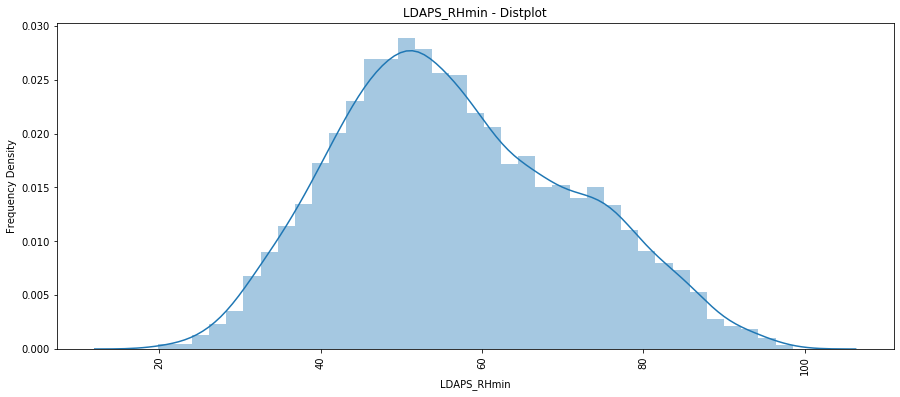

In [95]:
plt.figure(figsize=(15,6))
sns.distplot(df["LDAPS_RHmin"])
plt.xticks(rotation = 90)
plt.ylabel('Frequency Density')
plt.title('LDAPS_RHmin - Distplot')

The distribution of LDAPS model forecast of next-day minimum relative humidity (%) approximates a normal distribution skewed to right.

Text(0.5, 1.0, 'LDAPS_RHmax - Distplot')

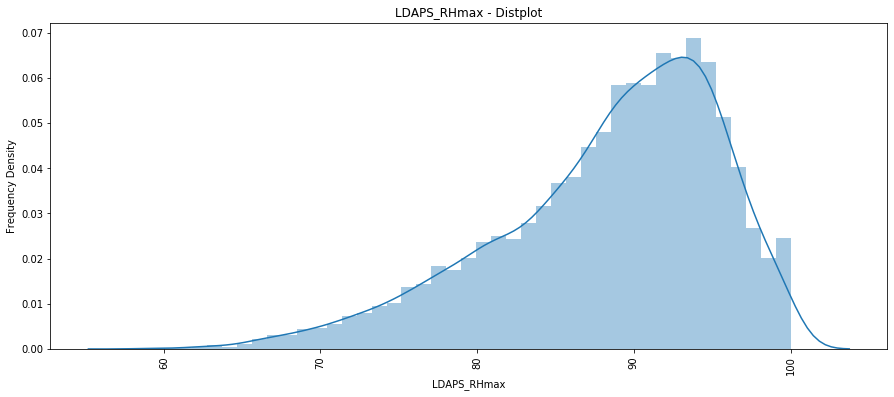

In [96]:
plt.figure(figsize=(15,6))
sns.distplot(df["LDAPS_RHmax"])
plt.xticks(rotation = 90)
plt.ylabel('Frequency Density')
plt.title('LDAPS_RHmax - Distplot')

The distribution of LDAPS model forecast of next-day maximum relative humidity (%) approximates a normal distribution skewed to left.

Text(0.5, 1.0, 'LDAPS_Tmax_lapse - Distplot')

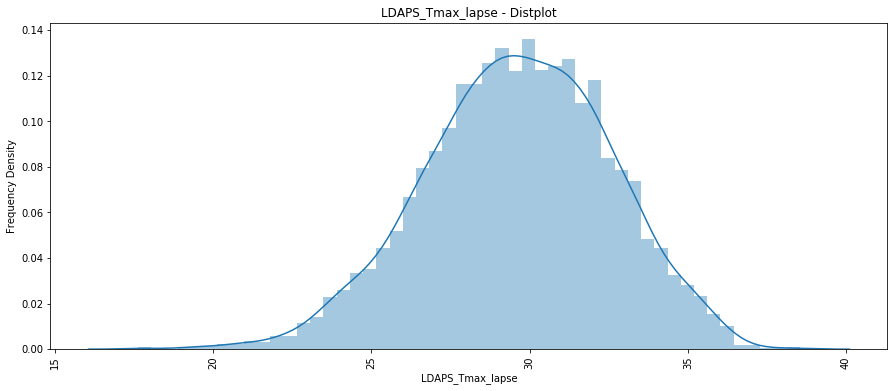

In [97]:
plt.figure(figsize=(15,6))
sns.distplot(df["LDAPS_Tmax_lapse"])
plt.xticks(rotation = 90)
plt.ylabel('Frequency Density')
plt.title('LDAPS_Tmax_lapse - Distplot')

The distribution of LDAPS model forecast of next-day maximum air temperature applied lapse rate approximates a normal distribution.

Text(0.5, 1.0, 'LDAPS_Tmin_lapse - Distplot')

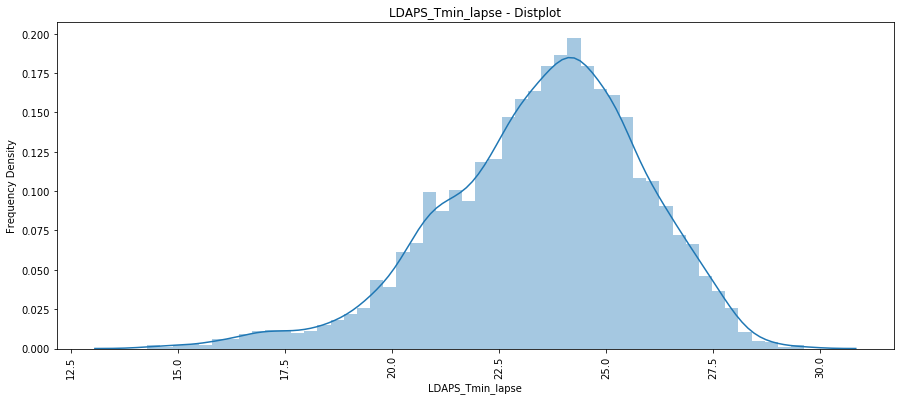

In [98]:
plt.figure(figsize=(15,6))
sns.distplot(df["LDAPS_Tmin_lapse"])
plt.xticks(rotation = 90)
plt.ylabel('Frequency Density')
plt.title('LDAPS_Tmin_lapse - Distplot')

The distribution of LDAPS model forecast of next-day minimum air temperature applied lapse rate approximates a normal distribution skewed to left.

Text(0.5, 1.0, 'LDAPS_WS - Distplot')

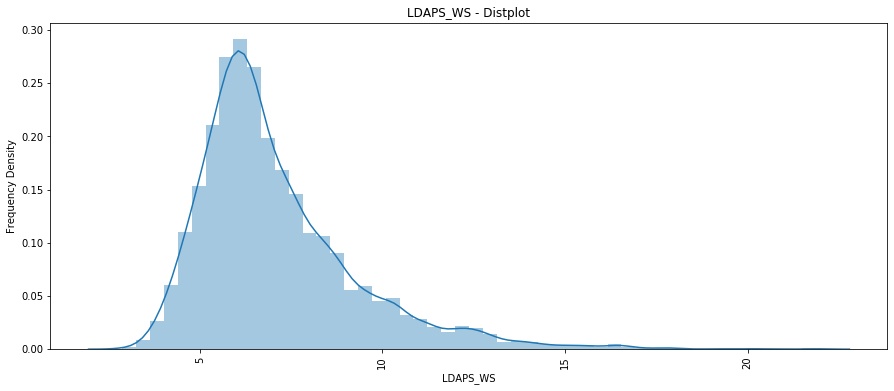

In [99]:
plt.figure(figsize=(15,6))
sns.distplot(df["LDAPS_WS"])
plt.xticks(rotation = 90)
plt.ylabel('Frequency Density')
plt.title('LDAPS_WS - Distplot')

The distribution of LDAPS model forecast of next-day average wind speed approximates a normal distribution skewed to right.

Text(0.5, 1.0, 'LDAPS_LH - Distplot')

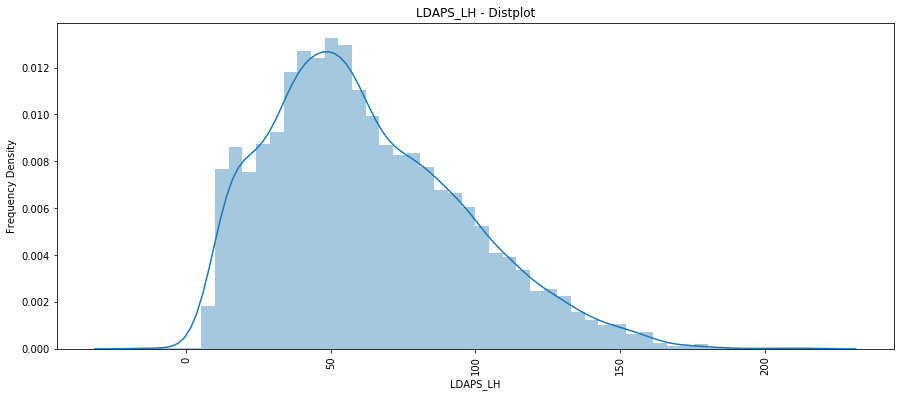

In [100]:
plt.figure(figsize=(15,6))
sns.distplot(df["LDAPS_LH"])
plt.xticks(rotation = 90)
plt.ylabel('Frequency Density')
plt.title('LDAPS_LH - Distplot')

The distribution of  LDAPS model forecast of next-day average latent heat flux (W/m2) approximates a normal distribution skewed to right.

Text(0.5, 1.0, 'LDAPS_CC1 - Distplot')

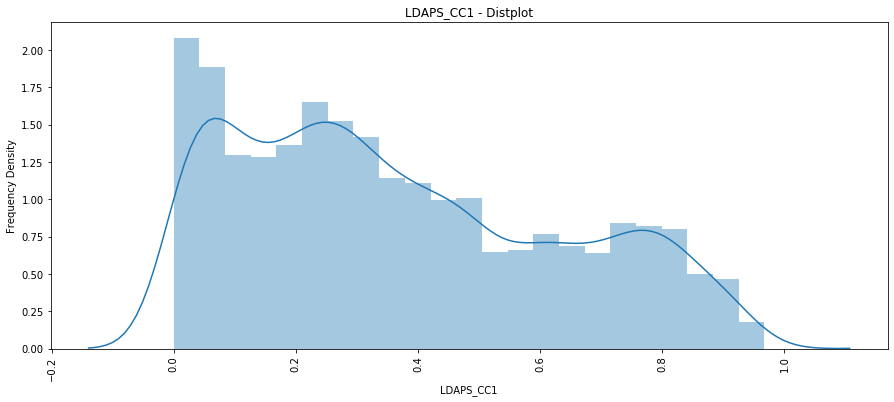

In [101]:
plt.figure(figsize=(15,6))
sns.distplot(df["LDAPS_CC1"])
plt.xticks(rotation = 90)
plt.ylabel('Frequency Density')
plt.title('LDAPS_CC1 - Distplot')

The distribution of LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%) is highly skewed to right.

Text(0.5, 1.0, 'LDAPS_CC2 - Distplot')

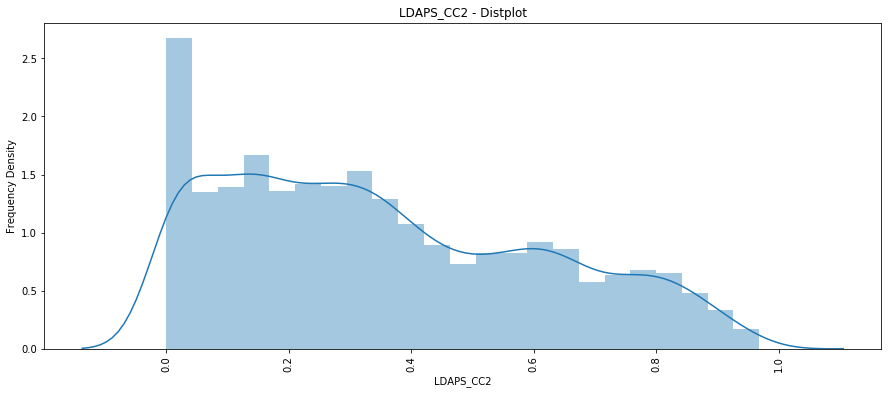

In [102]:
plt.figure(figsize=(15,6))
sns.distplot(df["LDAPS_CC2"])
plt.xticks(rotation = 90)
plt.ylabel('Frequency Density')
plt.title('LDAPS_CC2 - Distplot')

The distribution of LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%) is highly skewed to right.

Text(0.5, 1.0, 'LDAPS_CC3 - Distplot')

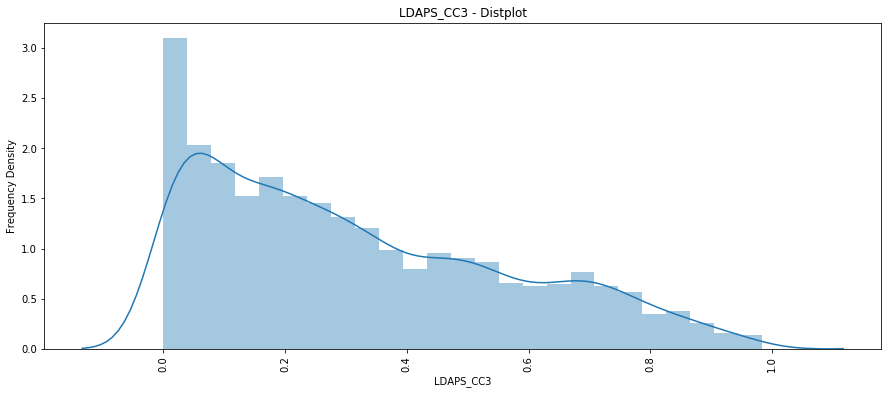

In [103]:
plt.figure(figsize=(15,6))
sns.distplot(df["LDAPS_CC3"])
plt.xticks(rotation = 90)
plt.ylabel('Frequency Density')
plt.title('LDAPS_CC3 - Distplot')

The distribution of LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%) is highly skewed to right.

Text(0.5, 1.0, 'LDAPS_CC4 - Distplot')

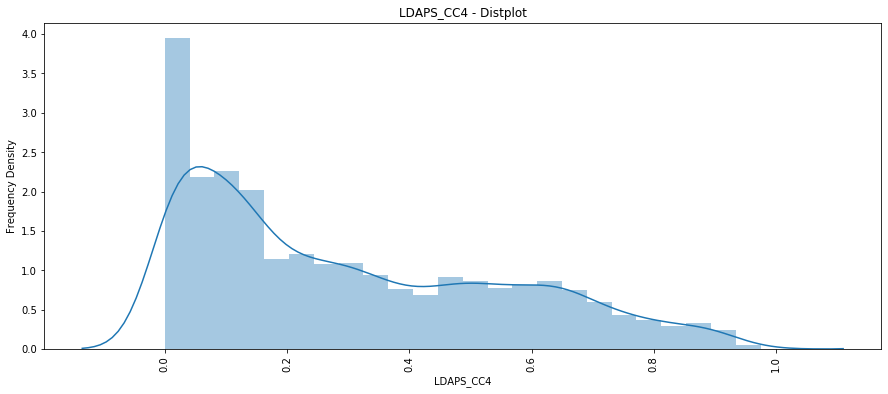

In [104]:
plt.figure(figsize=(15,6))
sns.distplot(df["LDAPS_CC4"])
plt.xticks(rotation = 90)
plt.ylabel('Frequency Density')
plt.title('LDAPS_CC4 - Distplot')

The distribution of LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%) is highly skewed to right.

Text(0.5, 1.0, 'LDAPS_PPT1 - Distplot')

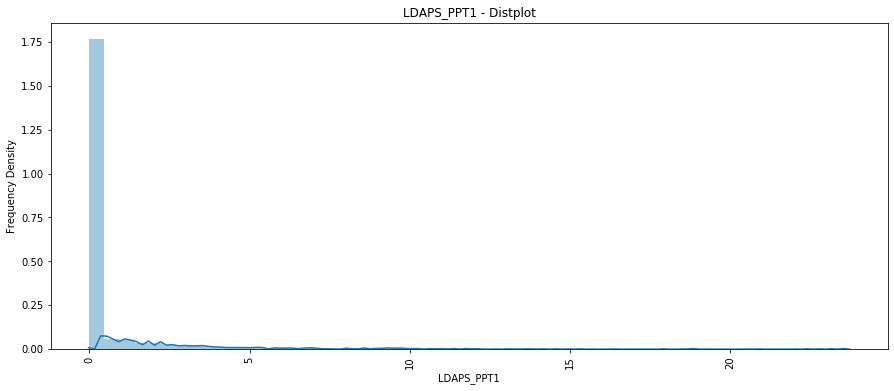

In [106]:
plt.figure(figsize=(15,6))
sns.distplot(df["LDAPS_PPT1"])
plt.xticks(rotation = 90)
plt.ylabel('Frequency Density')
plt.title('LDAPS_PPT1 - Distplot')

The distribution of LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%) is very highly skewed to right or there was very little precipitation.

Text(0.5, 1.0, 'LDAPS_PPT2 - Distplot')

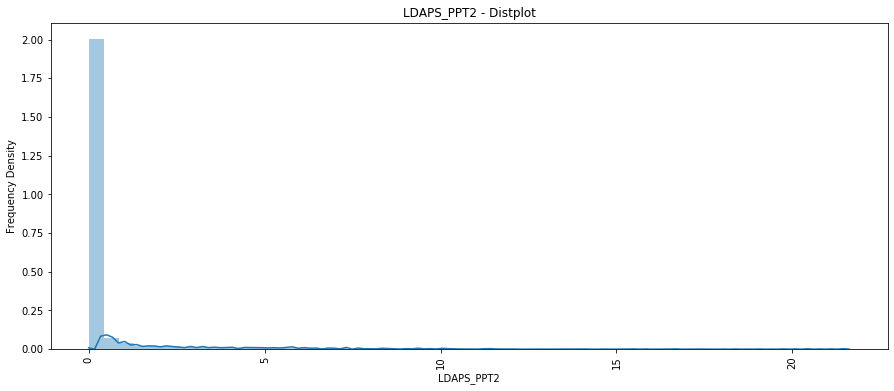

In [107]:
plt.figure(figsize=(15,6))
sns.distplot(df["LDAPS_PPT2"])
plt.xticks(rotation = 90)
plt.ylabel('Frequency Density')
plt.title('LDAPS_PPT2 - Distplot')

The distribution of LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%) is very highly skewed to right or there was very little precipitation.

Text(0.5, 1.0, 'LDAPS_PPT3 - Distplot')

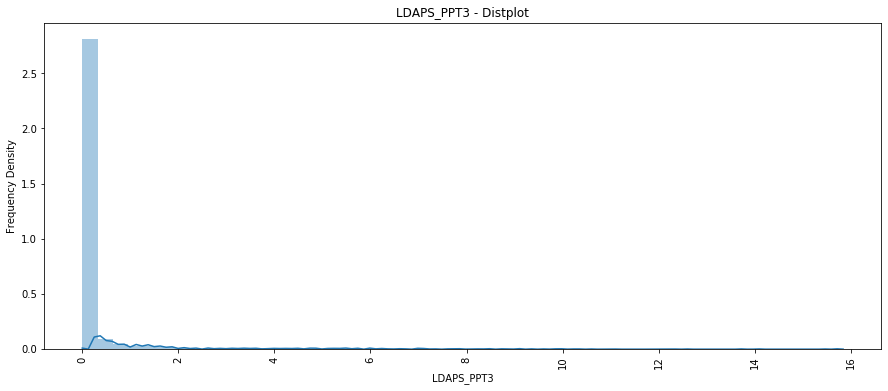

In [108]:
plt.figure(figsize=(15,6))
sns.distplot(df["LDAPS_PPT3"])
plt.xticks(rotation = 90)
plt.ylabel('Frequency Density')
plt.title('LDAPS_PPT3 - Distplot')

The distribution of LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%) is very highly skewed to right or there was very little precipitation.

Text(0.5, 1.0, 'LDAPS_PPT4 - Distplot')

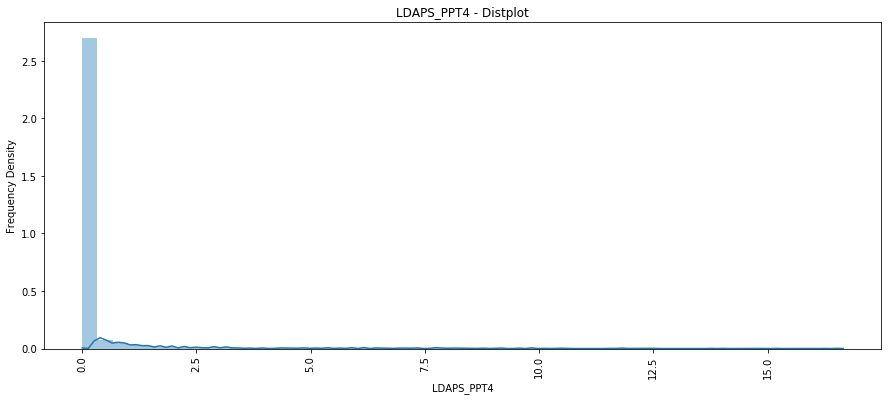

In [109]:
plt.figure(figsize=(15,6))
sns.distplot(df["LDAPS_PPT4"])
plt.xticks(rotation = 90)
plt.ylabel('Frequency Density')
plt.title('LDAPS_PPT4 - Distplot')

The distribution of LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%) is very highly skewed to right or there was very little precipitation.

Text(0.5, 1.0, 'Solar radiation - Distplot')

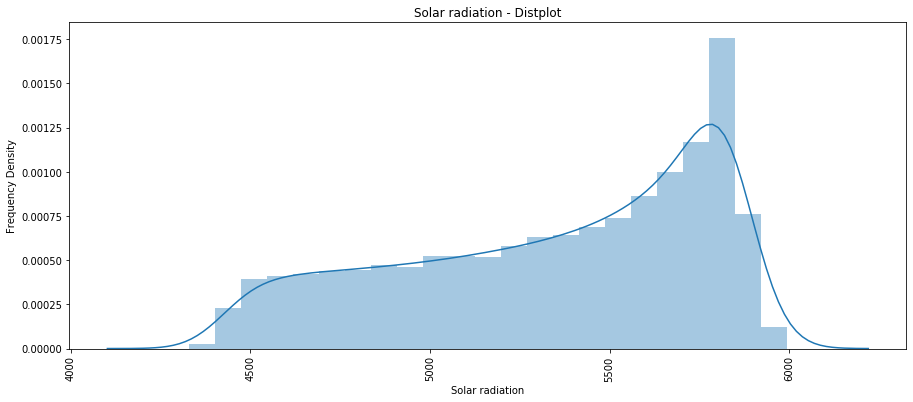

In [110]:
plt.figure(figsize=(15,6))
sns.distplot(df["Solar radiation"])
plt.xticks(rotation = 90)
plt.ylabel('Frequency Density')
plt.title('Solar radiation - Distplot')

The distribution of solar radiation is highly skewed to the left.

Text(0.5, 1.0, 'Next_Tmax - Distplot')

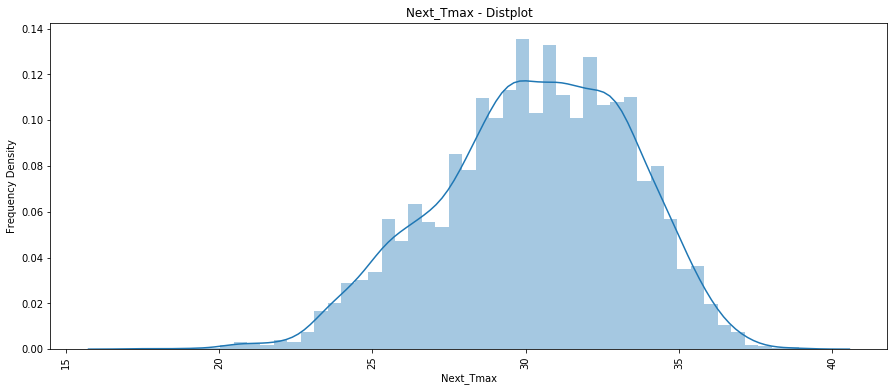

In [111]:
plt.figure(figsize=(15,6))
sns.distplot(df["Next_Tmax"])
plt.xticks(rotation = 90)
plt.ylabel('Frequency Density')
plt.title('Next_Tmax - Distplot')

The distribution of next-day maximum air temperature (Â°C) approximates a normal distirbution.

Text(0.5, 1.0, 'Next_Tmin - Distplot')

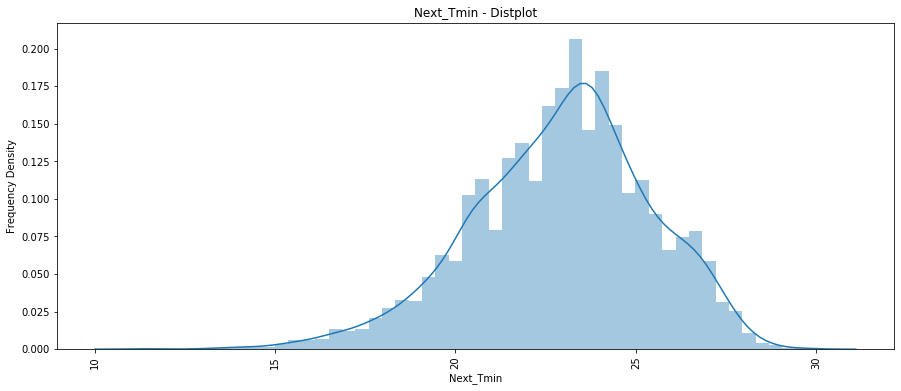

In [112]:
plt.figure(figsize=(15,6))
sns.distplot(df["Next_Tmin"])
plt.xticks(rotation = 90)
plt.ylabel('Frequency Density')
plt.title('Next_Tmin - Distplot')

The distribution of next-day minimum air temperature (Â°C) approximates a normal distirbution.

Let's compare the average values of all features as per station ID

In [113]:
station = df.groupby(['station'],sort = True).mean()
station

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month
station,,,,,,,,,,,,,,,,,,,,,
1.0,26.985621,21.164706,62.660746,92.682228,27.852246,22.118913,8.375969,77.535905,0.362039,0.352508,...,0.223088,37.6046,126.991,212.3350,2.7850,5476.319128,27.518710,20.893871,2015.0,7.467742
2.0,29.537742,22.190323,55.862548,89.161158,29.939720,23.504755,6.711439,58.454009,0.367279,0.355594,...,0.272387,37.6046,127.032,44.7624,0.5141,5339.816285,29.996774,21.873548,2015.0,7.467742
3.0,29.754369,23.441424,51.032357,85.002438,30.774944,24.017488,6.974995,24.374339,0.375871,0.362623,...,0.385239,37.5776,127.058,33.3068,0.2661,5334.356428,30.257419,23.146129,2015.0,7.467742
4.0,30.143042,23.607443,64.259764,95.478381,28.897602,22.558720,7.143694,87.397567,0.341316,0.336703,...,0.294710,37.6450,127.022,45.7160,2.5348,5326.104588,30.688065,23.296129,2015.0,7.467742
5.0,29.769967,23.044884,59.317978,91.959037,29.447258,23.228388,6.611610,105.012759,0.367559,0.356034,...,0.352000,37.5507,127.135,35.0380,0.5055,5326.335607,30.201311,22.764918,2015.0,7.467742
6.0,30.196066,24.047869,53.531008,85.721962,30.139799,23.924955,6.967407,55.418749,0.371765,0.358468,...,0.380874,37.5102,127.042,54.6384,0.1457,5340.324354,30.629739,23.801307,2015.0,7.467742
7.0,29.660784,23.773529,64.096749,91.918626,28.575366,23.484509,6.443936,110.311210,0.373730,0.360495,...,0.184533,37.5776,126.838,12.3700,0.0985,5318.127988,30.145098,23.505229,2015.0,7.467742
8.0,29.770820,23.745246,56.110321,87.574366,29.667119,23.675330,7.092765,50.875177,0.374963,0.361028,...,0.209307,37.4697,126.910,52.5180,1.5629,5325.971825,30.300977,23.493160,2015.0,7.467742
9.0,29.950164,23.116066,61.795051,91.563126,28.766810,23.131335,6.942082,83.828733,0.369483,0.361440,...,0.187359,37.4967,126.826,50.9312,0.4125,5347.358274,30.449677,22.850645,2015.0,7.467742


Text(0.5, 1.0, 'Average Present Tmax as per station ID')

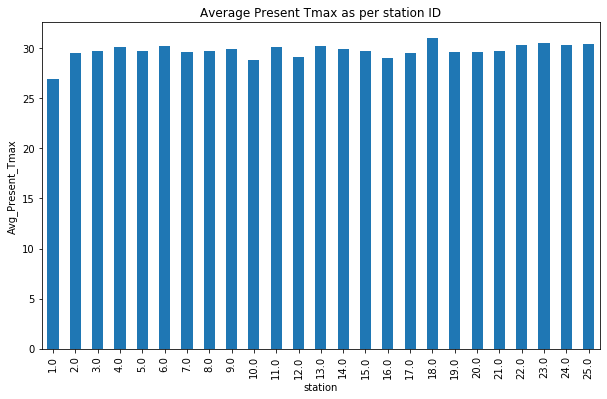

In [114]:
plt.figure(figsize=(10,6))
station["Present_Tmax"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_Present_Tmax')
plt.title('Average Present Tmax as per station ID')

Station 1 has the lowest Average maximum temperature.

Text(0.5, 1.0, 'Average Present Tmin as per station ID')

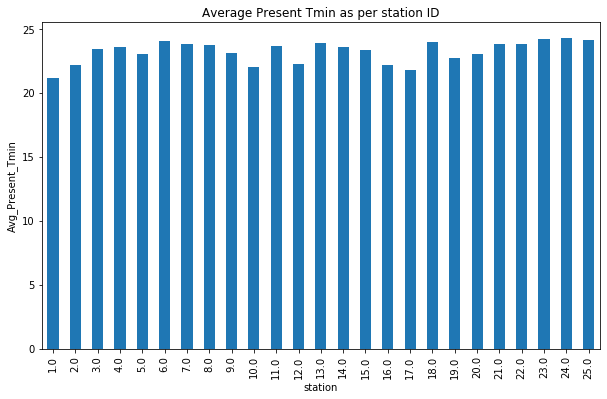

In [115]:
plt.figure(figsize=(10,6))
station["Present_Tmin"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_Present_Tmin')
plt.title('Average Present Tmin as per station ID')

Station 1 has the lowest Average minimum temperature.

Text(0.5, 1.0, 'Average LDAPS_RHmin as per station ID')

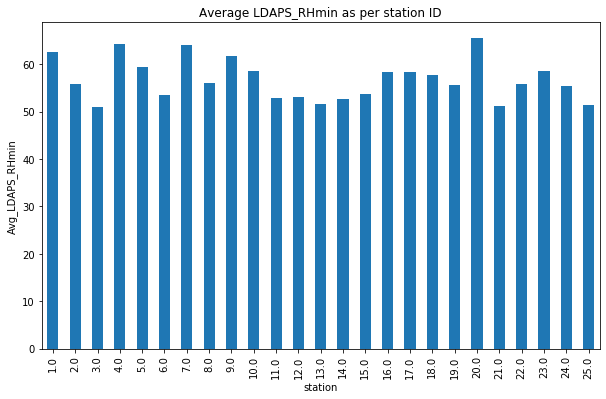

In [116]:
plt.figure(figsize=(10,6))
station["LDAPS_RHmin"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_RHmin')
plt.title('Average LDAPS_RHmin as per station ID')

Station 20 has the highest Average LDAPS model forecast of next-day minimum relative humidity (%)

Text(0.5, 1.0, 'Average LDAPS_RHmax as per station ID')

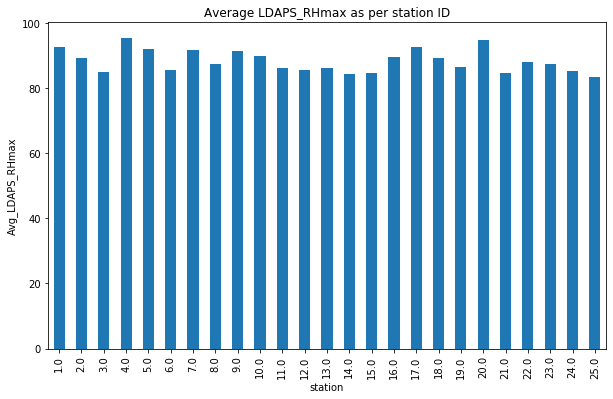

In [117]:
plt.figure(figsize=(10,6))
station["LDAPS_RHmax"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_RHmax')
plt.title('Average LDAPS_RHmax as per station ID')

Station 4 & 20 has the Average highest LDAPS model forecast of next-day maximum relative humidity (%)

Text(0.5, 1.0, 'Average LDAPS_Tmax_lapse as per station ID')

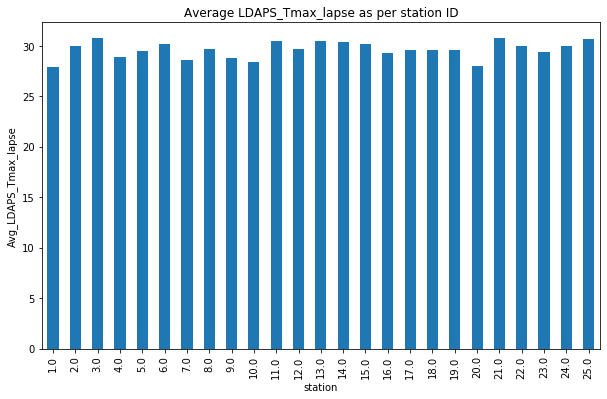

In [118]:
plt.figure(figsize=(10,6))
station["LDAPS_Tmax_lapse"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_Tmax_lapse')
plt.title('Average LDAPS_Tmax_lapse as per station ID')

Text(0.5, 1.0, 'Average LDAPS_Tmin_lapse as per station ID')

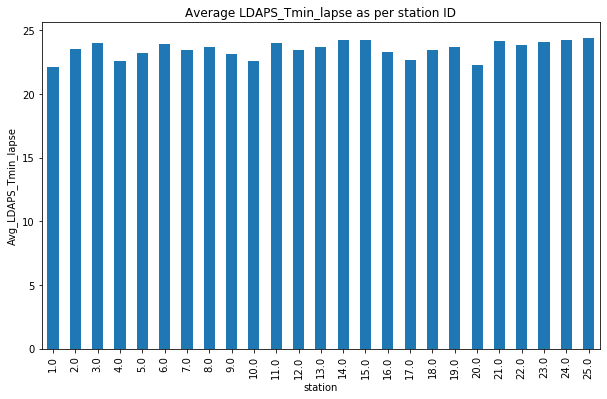

In [119]:
plt.figure(figsize=(10,6))
station["LDAPS_Tmin_lapse"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_Tmin_lapse')
plt.title('Average LDAPS_Tmin_lapse as per station ID')

Text(0.5, 1.0, 'Average LDAPS_WS as per station ID')

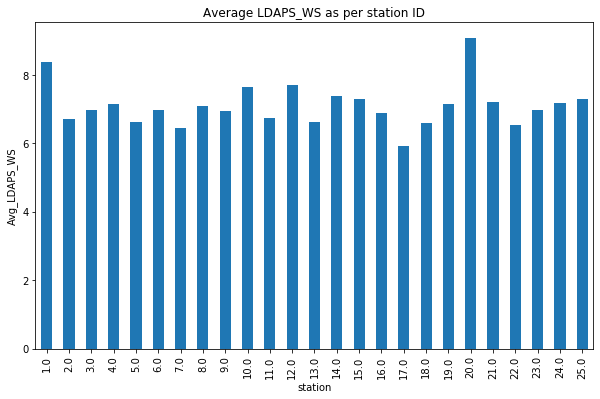

In [120]:
plt.figure(figsize=(10,6))
station["LDAPS_WS"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_WS')
plt.title('Average LDAPS_WS as per station ID')

Station 20 has the highest Average LDAPS model forecast of next-day average wind speed (m/s)

Text(0.5, 1.0, 'Average LDAPS_LH as per station ID')

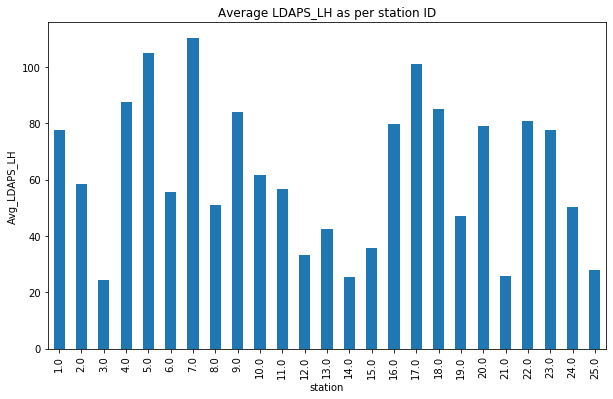

In [121]:
plt.figure(figsize=(10,6))
station["LDAPS_LH"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_LH')
plt.title('Average LDAPS_LH as per station ID')

Station 7 has the highest Average LDAPS model forecast of next-day average latent heat flux (W/m2)

Text(0.5, 1.0, 'Average LDAPS_CC1 as per station ID')

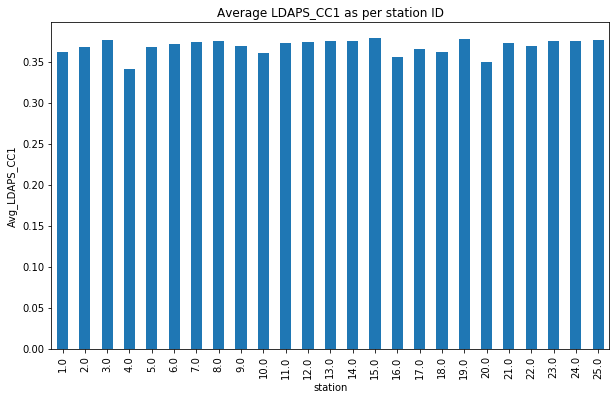

In [122]:
plt.figure(figsize=(10,6))
station["LDAPS_CC1"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_CC1')
plt.title('Average LDAPS_CC1 as per station ID')

Text(0.5, 1.0, 'Average LDAPS_CC2 as per station ID')

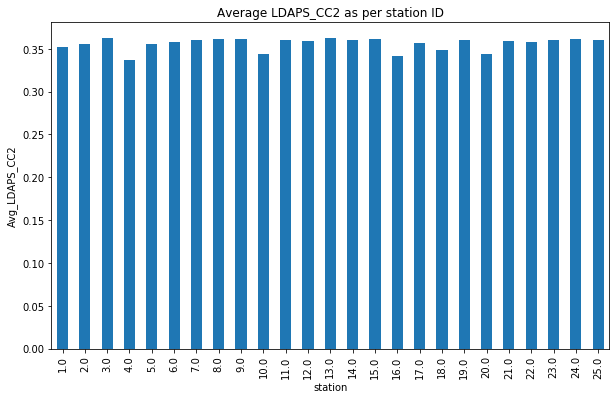

In [123]:
plt.figure(figsize=(10,6))
station["LDAPS_CC2"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_CC2')
plt.title('Average LDAPS_CC2 as per station ID')

Text(0.5, 1.0, 'Average LDAPS_CC3 as per station ID')

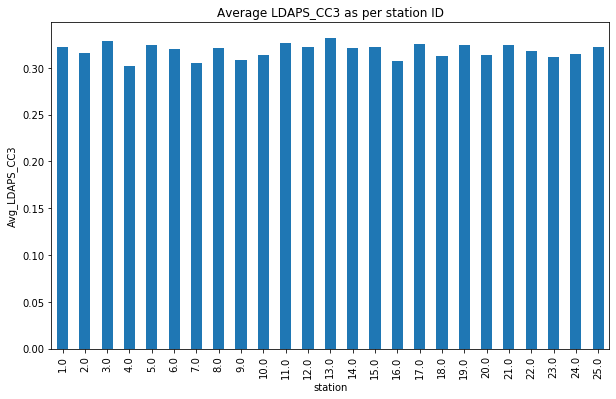

In [124]:
plt.figure(figsize=(10,6))
station["LDAPS_CC3"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_CC3')
plt.title('Average LDAPS_CC3 as per station ID')

Text(0.5, 1.0, 'Average LDAPS_CC4 as per station ID')

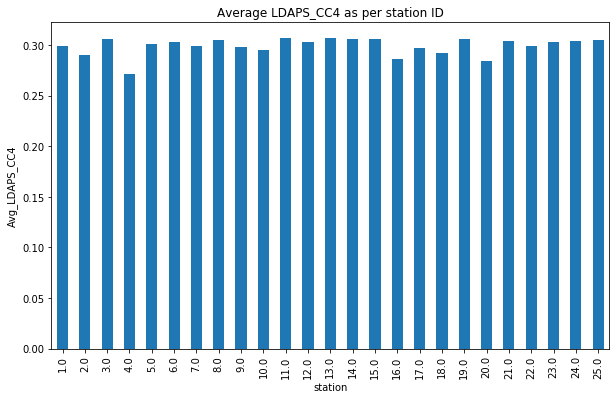

In [125]:
plt.figure(figsize=(10,6))
station["LDAPS_CC4"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_CC4')
plt.title('Average LDAPS_CC4 as per station ID')

Text(0.5, 1.0, 'Average LDAPS_PPT1 as per station ID')

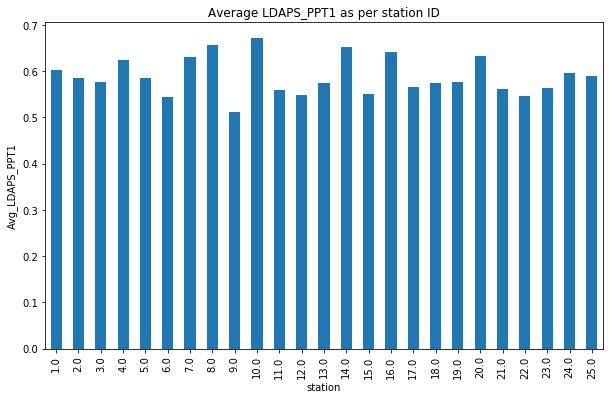

In [126]:
plt.figure(figsize=(10,6))
station["LDAPS_PPT1"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_PPT1')
plt.title('Average LDAPS_PPT1 as per station ID')

Text(0.5, 1.0, 'Average LDAPS_PPT2 as per station ID')

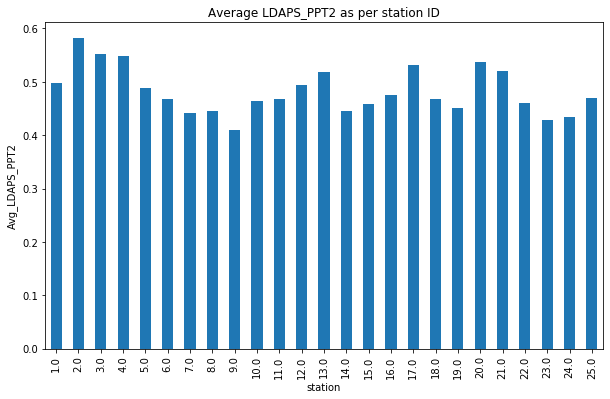

In [127]:
plt.figure(figsize=(10,6))
station["LDAPS_PPT2"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_PPT2')
plt.title('Average LDAPS_PPT2 as per station ID')

Text(0.5, 1.0, 'Average LDAPS_PPT3 as per station ID')

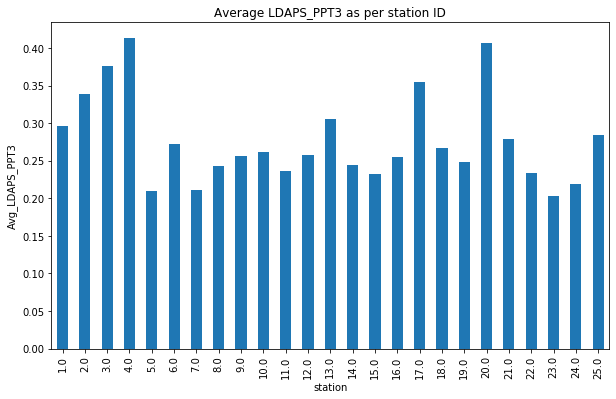

In [128]:
plt.figure(figsize=(10,6))
station["LDAPS_PPT3"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_PPT3')
plt.title('Average LDAPS_PPT3 as per station ID')

Text(0.5, 1.0, 'Average LD4PS_PPT3 as per station ID')

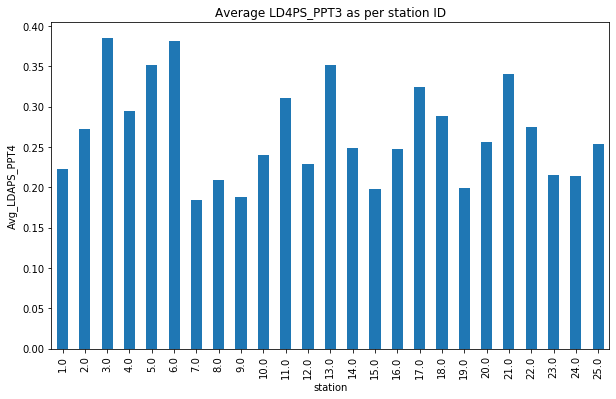

In [129]:
plt.figure(figsize=(10,6))
station["LDAPS_PPT4"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_PPT4')
plt.title('Average LD4PS_PPT3 as per station ID')

Text(0.5, 1.0, 'Average Solar radiation as per station ID')

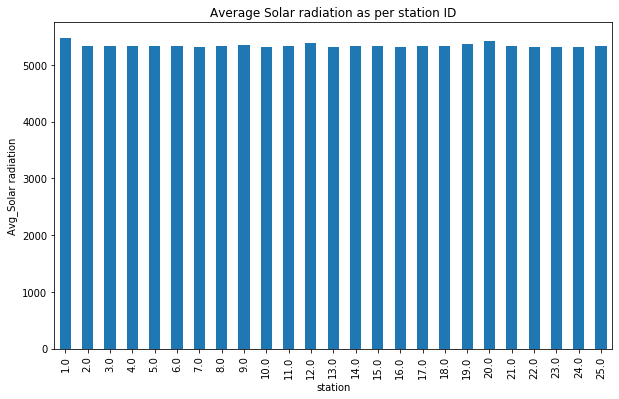

In [130]:
plt.figure(figsize=(10,6))
station["Solar radiation"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_Solar radiation')
plt.title('Average Solar radiation as per station ID')

Average solar radiation is almost the same for all stations.

Text(0.5, 1.0, 'Average Next_Tmax as per station ID')

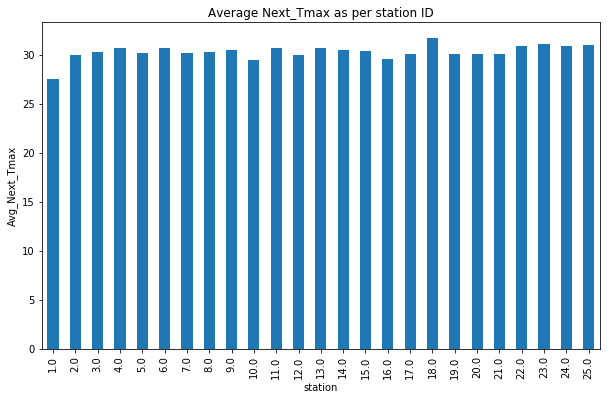

In [131]:
plt.figure(figsize=(10,6))
station["Next_Tmax"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_Next_Tmax')
plt.title('Average Next_Tmax as per station ID')

Text(0.5, 1.0, 'Average Next_Tmin as per station ID')

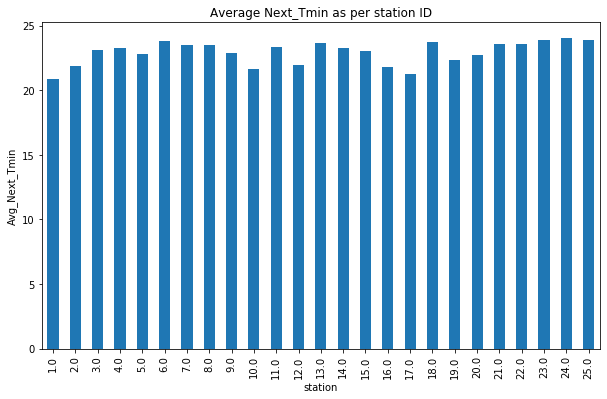

In [132]:
plt.figure(figsize=(10,6))
station["Next_Tmin"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_Next_Tmin')
plt.title('Average Next_Tmin as per station ID')

Let's compare the average values of all features as per year

In [133]:
year = df.groupby(['year'],sort = True).mean()
year

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month
year,,,,,,,,,,,,,,,,,,,,,
2013.0,13.0,29.728107,24.000651,60.772765,90.382044,29.903802,24.473490,7.850558,57.774947,0.428988,...,0.189152,0.246750,37.54472,126.9914,61.854944,1.256692,5346.24029,30.152553,23.705882,7.467742
2014.0,13.0,29.093992,22.218669,54.513016,89.449915,29.070989,22.521111,6.758060,62.879415,0.357298,...,0.365589,0.239865,37.54472,126.9914,61.854944,1.256692,5346.24029,29.611491,21.962750,7.467742
2015.0,13.0,29.748112,22.574544,52.425319,86.910424,29.501571,22.986051,7.085249,62.295891,0.326020,...,0.062476,0.101641,37.54472,126.9914,61.854944,1.256692,5346.24029,30.366213,22.356291,7.467742
2016.0,13.0,30.743811,23.827285,56.570660,87.346970,30.002982,23.850905,6.870829,66.912427,0.374403,...,0.396329,0.445277,37.54472,126.9914,61.854944,1.256692,5322.78549,31.253070,23.496962,7.467742
2017.0,13.0,29.525989,23.515963,59.570647,87.795378,29.607111,23.759820,6.922690,62.680039,0.358163,...,0.369965,0.308413,37.54472,126.9914,61.854944,1.256692,5346.24029,29.993368,23.142913,7.467742


Text(0.5, 1.0, 'Average Present_Tmax as per Year')

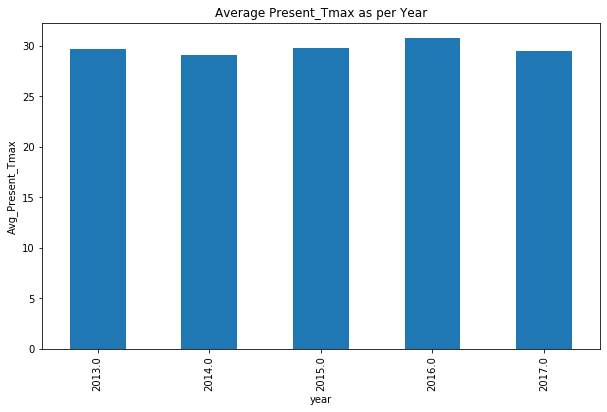

In [134]:
plt.figure(figsize=(10,6))
year["Present_Tmax"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_Present_Tmax')
plt.title('Average Present_Tmax as per Year')

Average Present Tmax was highest for the year 2016

Text(0.5, 1.0, 'Average Present_Tmin as per Year')

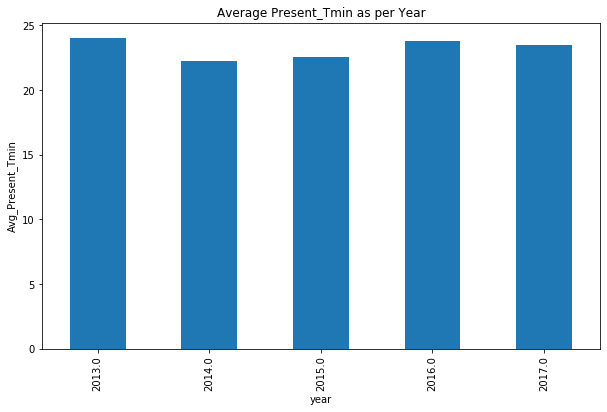

In [135]:
plt.figure(figsize=(10,6))
year["Present_Tmin"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_Present_Tmin')
plt.title('Average Present_Tmin as per Year')

Average Present Tmin was lowest for the year 2014.

Text(0.5, 1.0, 'Average LDAPS_RHmin as per Year')

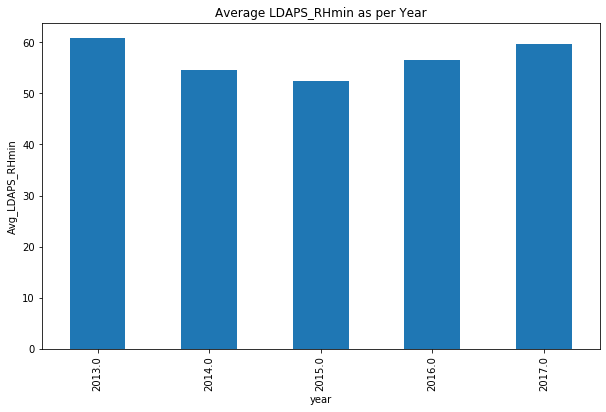

In [136]:
plt.figure(figsize=(10,6))
year["LDAPS_RHmin"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_RHmin')
plt.title('Average LDAPS_RHmin as per Year')

Average LDAPS model forecast of next-day minimum relative humidity (%) was lowest for the year 2015 and highest for 2013.

Text(0.5, 1.0, 'Average LDAPS_RHmax as per Year')

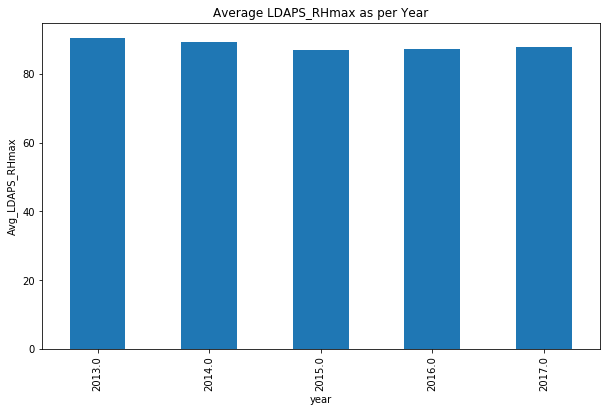

In [137]:
plt.figure(figsize=(10,6))
year["LDAPS_RHmax"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_RHmax')
plt.title('Average LDAPS_RHmax as per Year')

Average LDAPS model forecast of next-day maximum relative humidity (%) was almost the same over the years.

Text(0.5, 1.0, 'Average LDAPS_Tmax_lapse as per Year')

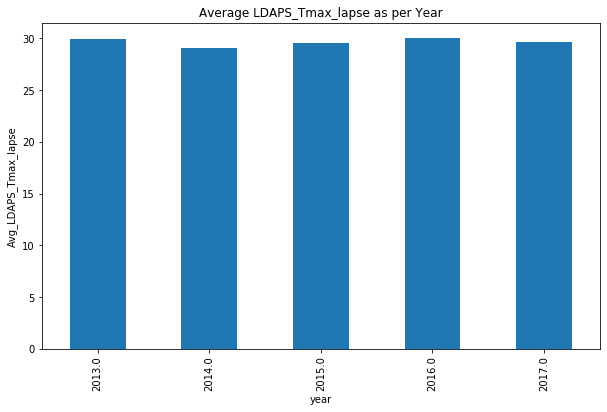

In [138]:
plt.figure(figsize=(10,6))
year["LDAPS_Tmax_lapse"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_Tmax_lapse')
plt.title('Average LDAPS_Tmax_lapse as per Year')

Average LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C) was almost the same over the years.

Text(0.5, 1.0, 'Average LDAPS_Tmin_lapse as per Year')

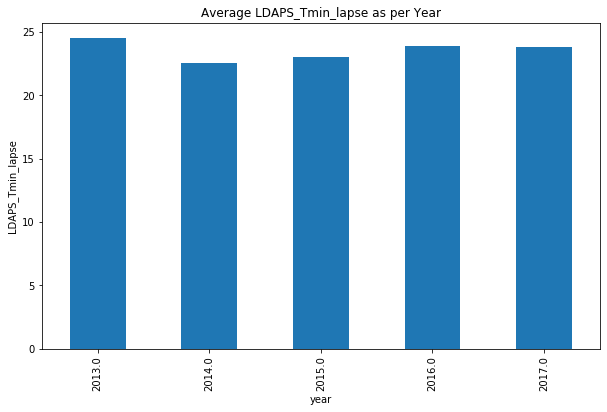

In [139]:
plt.figure(figsize=(10,6))
year["LDAPS_Tmin_lapse"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('LDAPS_Tmin_lapse')
plt.title('Average LDAPS_Tmin_lapse as per Year')

Average LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C) was lowest for the year 2014.

Text(0.5, 1.0, 'Average LDAPS_WS as per Year')

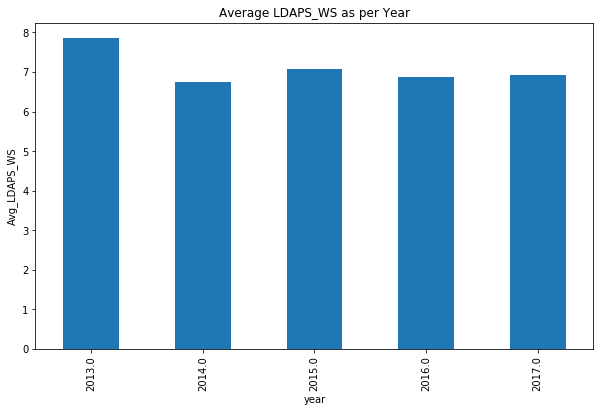

In [140]:
plt.figure(figsize=(10,6))
year["LDAPS_WS"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_WS')
plt.title('Average LDAPS_WS as per Year')

Average LDAPS model forecast of next-day average wind speed (m/s) was highest for the year 2013 and lowest for the year 2014.

Text(0.5, 1.0, 'Average LDAPS_LH as per Year')

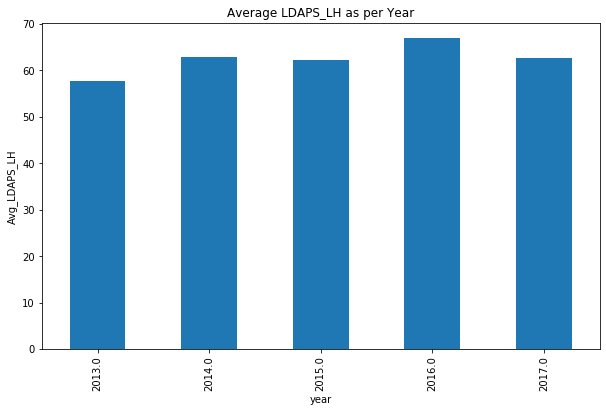

In [141]:
plt.figure(figsize=(10,6))
year["LDAPS_LH"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_LH')
plt.title('Average LDAPS_LH as per Year')

Average LDAPS model forecast of next-day average latent heat flux (W/m2) was lowest for the year 2013 and highest for the year 2016.

Text(0.5, 1.0, 'Average LDAPS_CC1 as per Year')

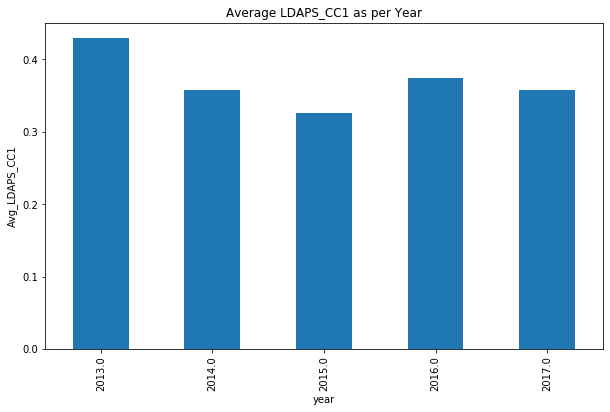

In [142]:
plt.figure(figsize=(10,6))
year["LDAPS_CC1"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_CC1')
plt.title('Average LDAPS_CC1 as per Year')

Text(0.5, 1.0, 'Average LDAPS_CC2 as per Year')

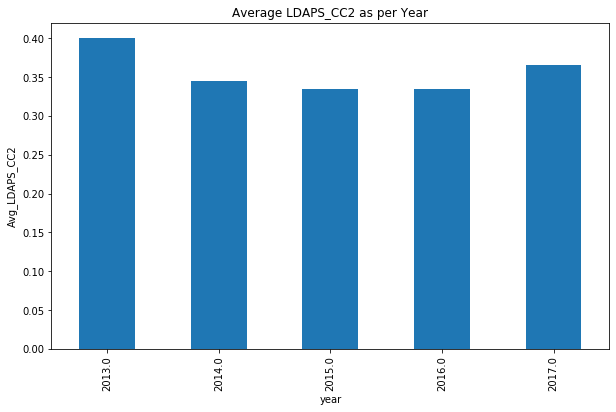

In [63]:
plt.figure(figsize=(10,6))
year["LDAPS_CC2"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_CC2')
plt.title('Average LDAPS_CC2 as per Year')

Text(0.5, 1.0, 'Average LDAPS_CC3 as per Year')

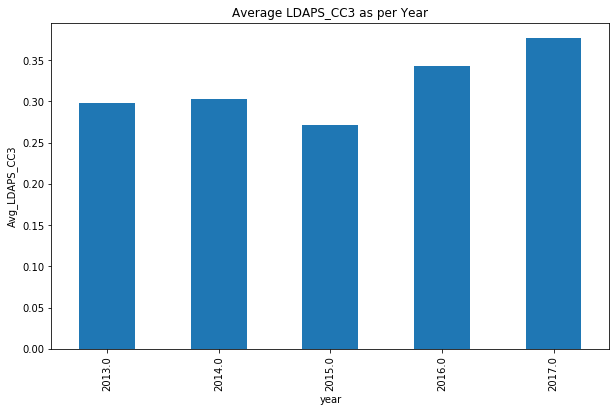

In [64]:
plt.figure(figsize=(10,6))
year["LDAPS_CC3"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_CC3')
plt.title('Average LDAPS_CC3 as per Year')

Text(0.5, 1.0, 'Average LDAPS_CC4 as per Year')

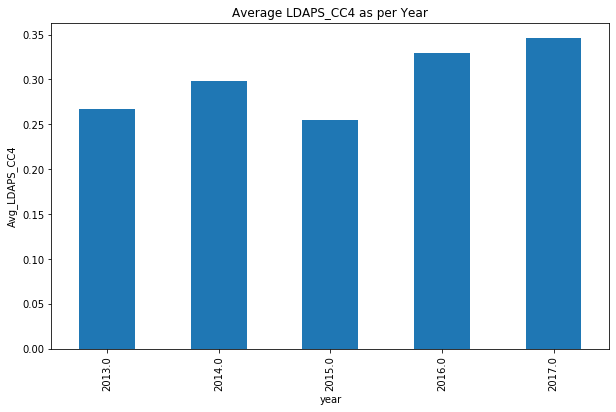

In [65]:
plt.figure(figsize=(10,6))
year["LDAPS_CC4"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_CC4')
plt.title('Average LDAPS_CC4 as per Year')

Average  LDAPS model forecast of next-day split average cloud cover was lowest for the year 2015.

Text(0.5, 1.0, 'Average LDAPS_PPT1 as per Year')

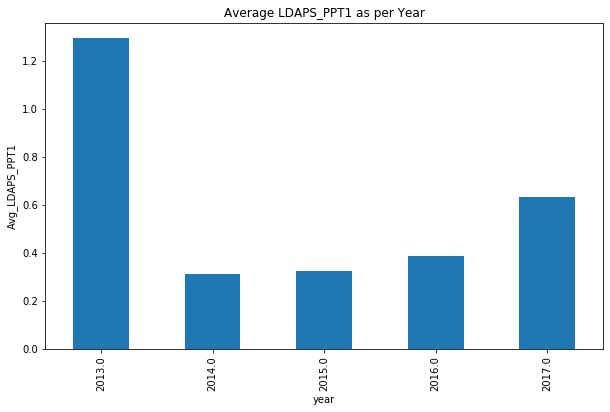

In [143]:
plt.figure(figsize=(10,6))
year["LDAPS_PPT1"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_PPT1')
plt.title('Average LDAPS_PPT1 as per Year')

Text(0.5, 1.0, 'Average LDAPS_PPT2 as per Year')

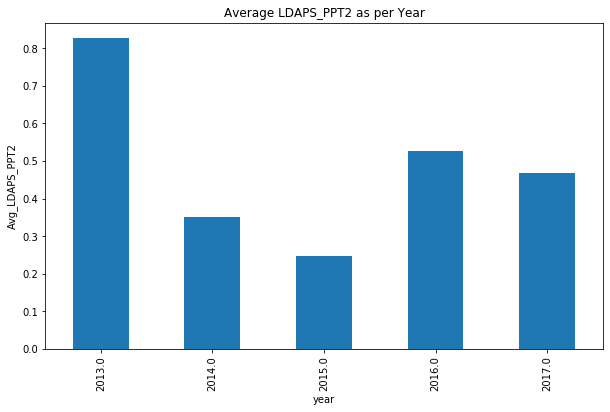

In [144]:
plt.figure(figsize=(10,6))
year["LDAPS_PPT2"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_PPT2')
plt.title('Average LDAPS_PPT2 as per Year')

Text(0.5, 1.0, 'Average LDAPS_PPT3 as per Year')

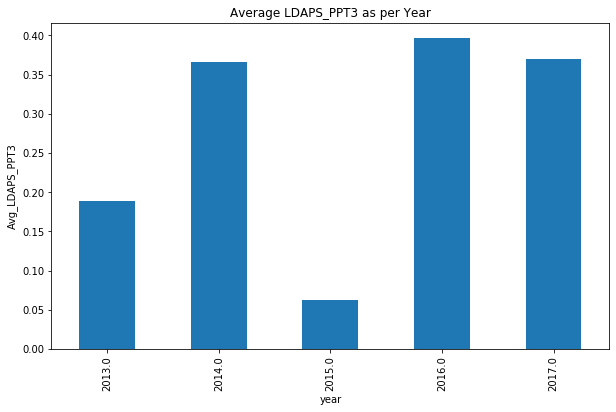

In [145]:
plt.figure(figsize=(10,6))
year["LDAPS_PPT3"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_PPT3')
plt.title('Average LDAPS_PPT3 as per Year')

Text(0.5, 1.0, 'Average LDAPS_PPT4 as per Year')

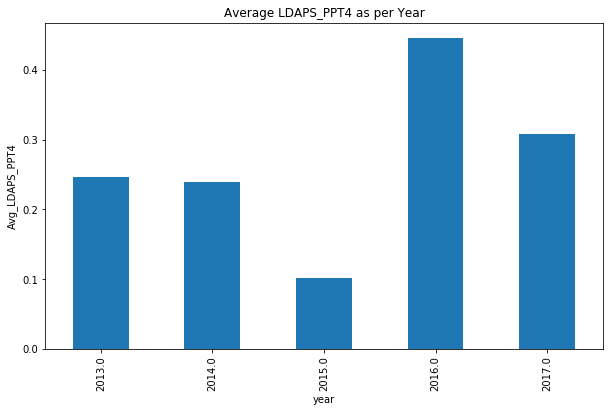

In [146]:
plt.figure(figsize=(10,6))
year["LDAPS_PPT4"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_PPT4')
plt.title('Average LDAPS_PPT4 as per Year')

Average LDAPS model forecast of next-day split average precipitation (%) was lowest for the year 2015.

Text(0.5, 1.0, 'Average Next_Tmax as per Year')

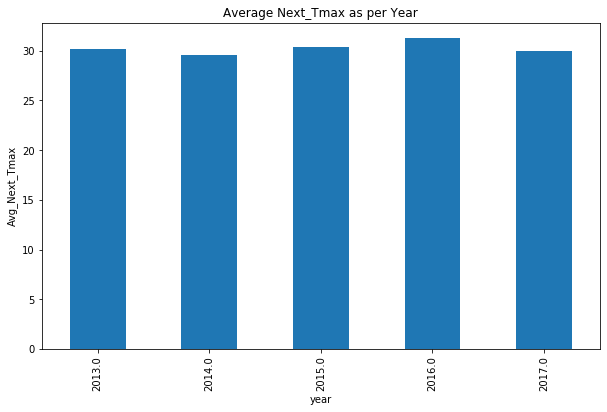

In [147]:
plt.figure(figsize=(10,6))
year["Next_Tmax"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_Next_Tmax')
plt.title('Average Next_Tmax as per Year')

The next-day Average maximum air temperature (Â°C) was highest for the year 2016

Text(0.5, 1.0, 'Average Next_Tmin as per Year')

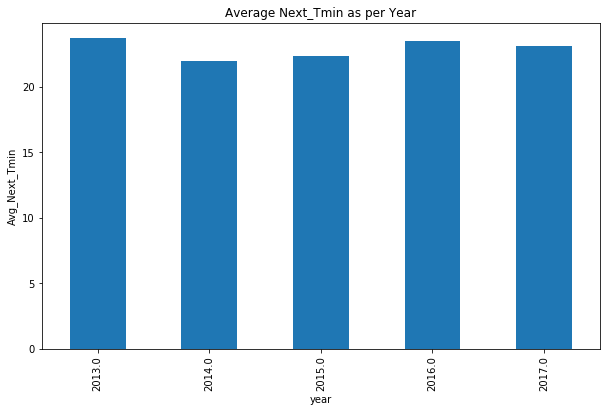

In [149]:
plt.figure(figsize=(10,6))
year["Next_Tmin"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_Next_Tmin')
plt.title('Average Next_Tmin as per Year')

The next-day Average minimum air temperature (Â°C) was lowest for the year 2014.

Let's compare the average distribution of different features as per month

In [150]:
month = df.groupby(['month'],sort = True).mean()
month

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year
month,,,,,,,,,,,,,,,,,,,,,
6.0,13.0,29.326724,21.830172,54.539261,88.811666,28.157558,22.268598,7.270106,62.442396,0.301041,...,0.048921,1.682432,37.54472,126.9914,61.854944,1.256692,5873.608813,29.702400,21.749600,2015.0
7.0,13.0,29.334416,23.085844,59.848149,89.249035,29.403627,23.535525,7.344120,60.137692,0.431543,...,0.233158,0.243371,37.54472,126.9914,61.854944,1.256692,5690.226947,29.972433,22.920559,2015.0
8.0,13.0,30.232202,23.414351,53.619081,87.455186,29.881784,23.531596,6.832978,64.950218,0.305686,...,0.328682,0.244406,37.54472,126.9914,61.854944,1.256692,4963.513810,30.608684,22.985205,2015.0


Text(0.5, 1.0, 'Average Present_Tmax as per month')

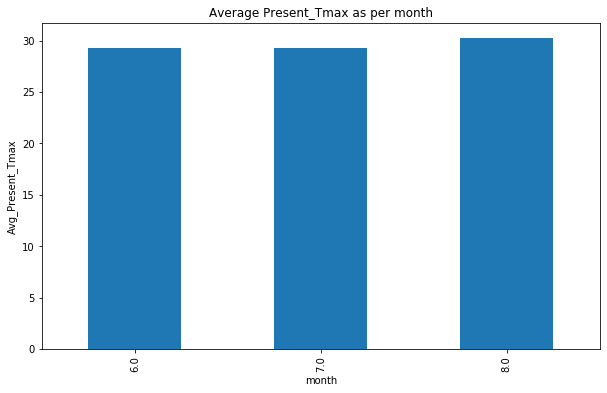

In [151]:
plt.figure(figsize=(10,6))
month["Present_Tmax"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_Present_Tmax')
plt.title('Average Present_Tmax as per month')

Average daily max temp was highest for the month of August

Text(0.5, 1.0, 'Average Present_Tmin as per month')

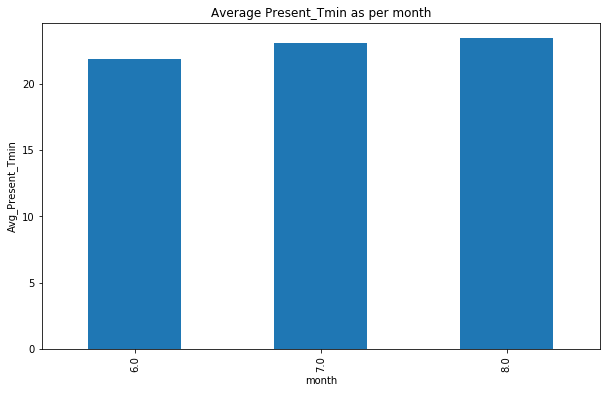

In [152]:
plt.figure(figsize=(10,6))
month["Present_Tmin"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_Present_Tmin')
plt.title('Average Present_Tmin as per month')

Average daily min temp was least for the month of June and max for August

Text(0.5, 1.0, 'Average LDAPS_RHmin as per month')

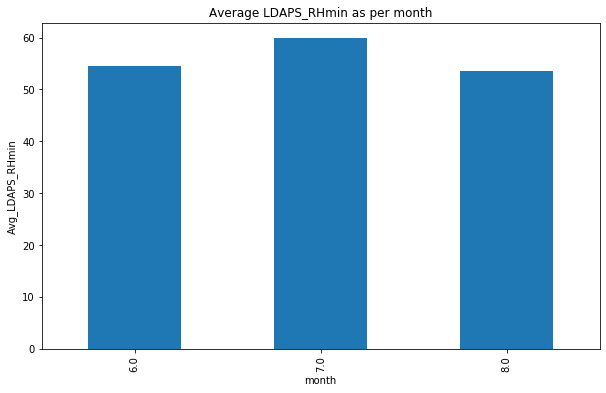

In [153]:
plt.figure(figsize=(10,6))
month["LDAPS_RHmin"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_RHmin')
plt.title('Average LDAPS_RHmin as per month')

Average LDAPS model forecast of next-day minimum relative humidity was highest for the month of July.

Text(0.5, 1.0, 'Average LDAPS_RHmax as per month')

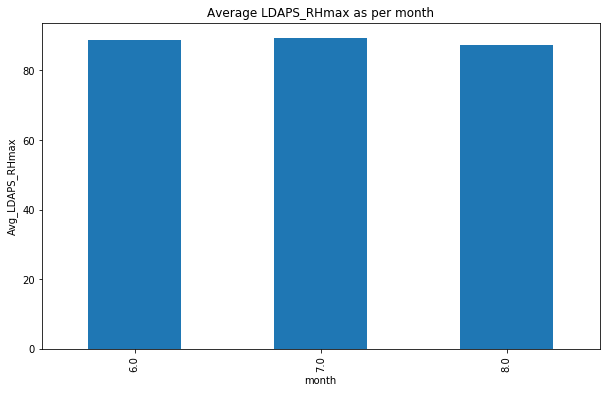

In [76]:
plt.figure(figsize=(10,6))
month["LDAPS_RHmax"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_RHmax')
plt.title('Average LDAPS_RHmax as per month')

Average LDAPS model forecast of next-day maximum relative humidity (%) was almost the same for all months.

Text(0.5, 1.0, 'Average LDAPS_Tmax_lapse as per month')

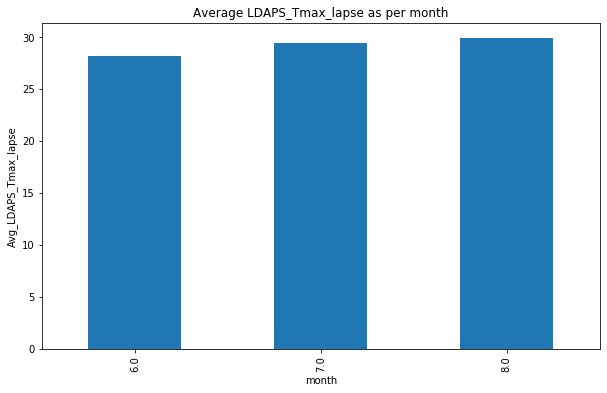

In [154]:
plt.figure(figsize=(10,6))
month["LDAPS_Tmax_lapse"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_Tmax_lapse')
plt.title('Average LDAPS_Tmax_lapse as per month')

Average LDAPS model forecast of next-day maximum air temperature applied lapse rate was highest for August & lowest for June.

Text(0.5, 1.0, 'Average LDAPS_Tmin_lapse as per month')

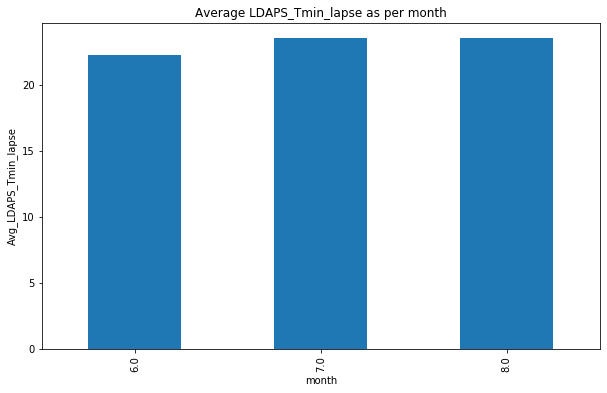

In [155]:
plt.figure(figsize=(10,6))
month["LDAPS_Tmin_lapse"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_Tmin_lapse')
plt.title('Average LDAPS_Tmin_lapse as per month')

Average LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C) was lowest for the month June & highest for August

Text(0.5, 1.0, 'Average LDAPS_WS as per month')

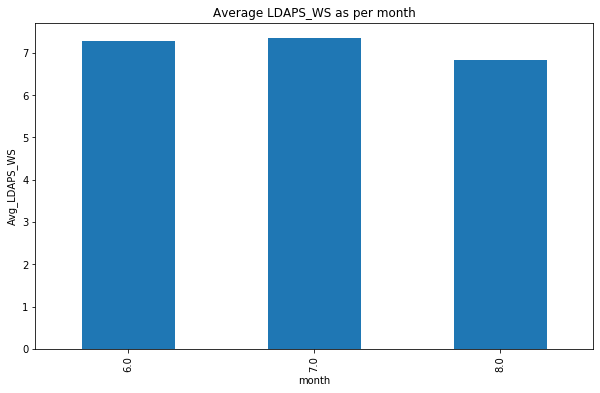

In [79]:
plt.figure(figsize=(10,6))
month["LDAPS_WS"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_WS')
plt.title('Average LDAPS_WS as per month')

Average LDAPS model forecast of next-day average wind speed (m/s) was lowest for August and highest for July

Text(0.5, 1.0, 'Average LDAPS_LH as per month')

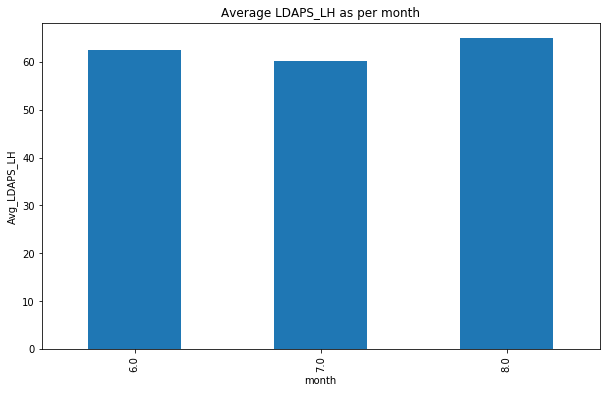

In [80]:
plt.figure(figsize=(10,6))
month["LDAPS_LH"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_LH')
plt.title('Average LDAPS_LH as per month')

Average LDAPS model forecast of next-day average latent heat flux (W/m2) was highest for August and lowest for July

Text(0.5, 1.0, 'Average LDAPS_CC1 as per month')

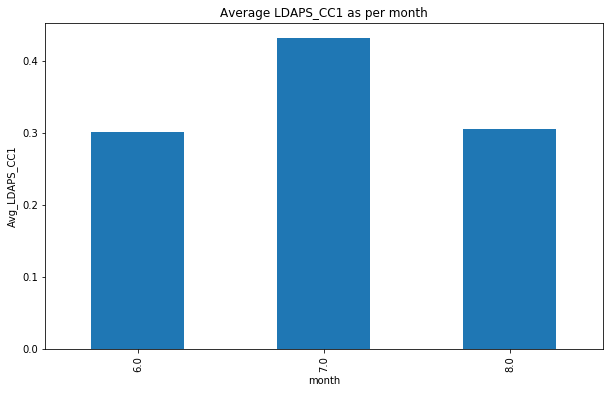

In [156]:
plt.figure(figsize=(10,6))
month["LDAPS_CC1"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_CC1')
plt.title('Average LDAPS_CC1 as per month')

Text(0.5, 1.0, 'Average LDAPS_CC2 as per month')

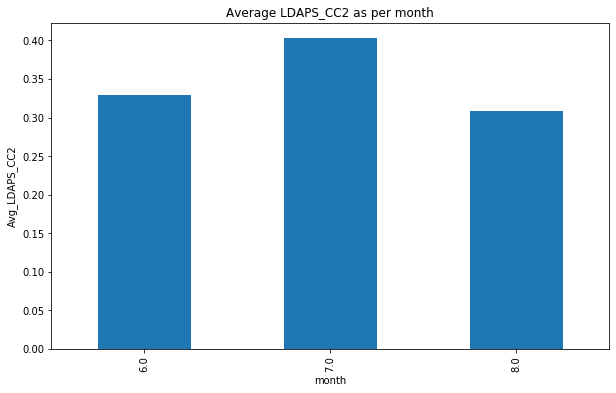

In [157]:
plt.figure(figsize=(10,6))
month["LDAPS_CC2"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_CC2')
plt.title('Average LDAPS_CC2 as per month')

Text(0.5, 1.0, 'Average LDAPS_CC3 as per month')

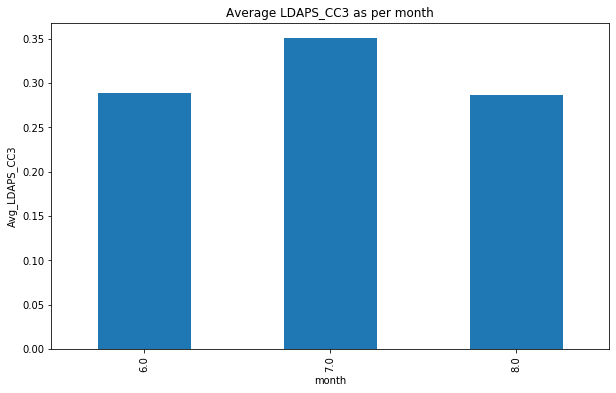

In [158]:
plt.figure(figsize=(10,6))
month["LDAPS_CC3"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_CC3')
plt.title('Average LDAPS_CC3 as per month')

Text(0.5, 1.0, 'Average LDAPS_CC4 as per month')

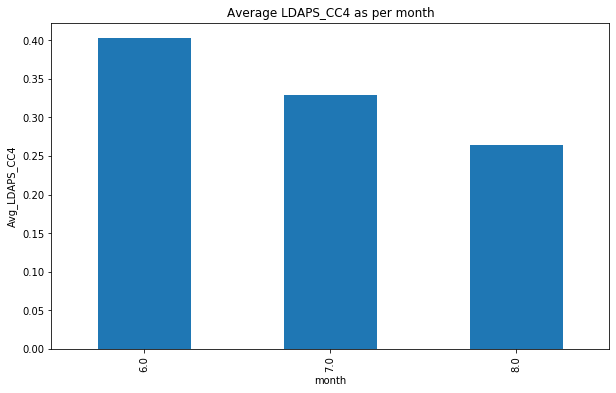

In [159]:
plt.figure(figsize=(10,6))
month["LDAPS_CC4"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_CC4')
plt.title('Average LDAPS_CC4 as per month')

Average LDAPS model forecast of next-day (24 hours) split average cloud cover was highest for July.

Text(0.5, 1.0, 'Average LDAPS_PPT1 as per month')

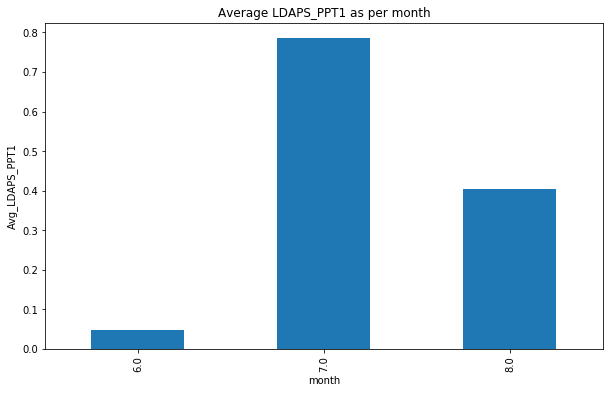

In [160]:
plt.figure(figsize=(10,6))
month["LDAPS_PPT1"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_PPT1')
plt.title('Average LDAPS_PPT1 as per month')

Text(0.5, 1.0, 'Average LDAPS_PPT2 as per month')

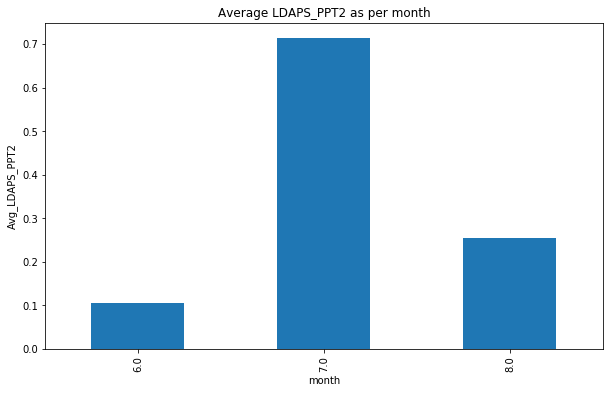

In [161]:
plt.figure(figsize=(10,6))
month["LDAPS_PPT2"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_PPT2')
plt.title('Average LDAPS_PPT2 as per month')

Average LDAPS model forecast of next-day 1st 12-hour (0-11 h) split average precipitation was highest for July and lowest for June.

Text(0.5, 1.0, 'Average LDAPS_PPT3 as per month')

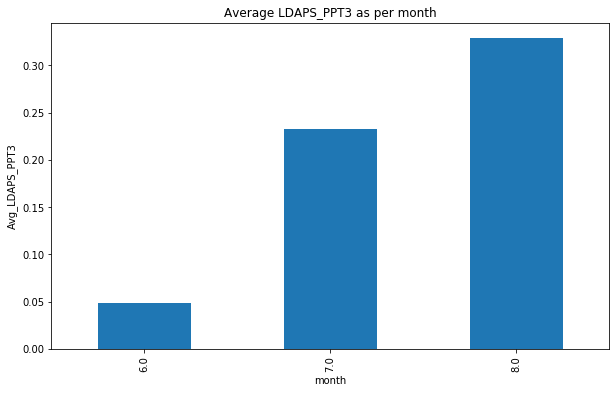

In [164]:
plt.figure(figsize=(10,6))
month["LDAPS_PPT3"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_PPT3')
plt.title('Average LDAPS_PPT3 as per month')

Average LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%) was highest for August.

Text(0.5, 1.0, 'Average LDAPS_PPT4 as per month')

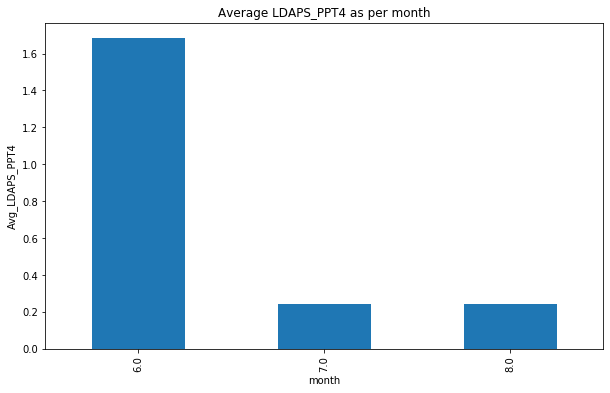

In [165]:
plt.figure(figsize=(10,6))
month["LDAPS_PPT4"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_LDAPS_PPT4')
plt.title('Average LDAPS_PPT4 as per month')

Avg LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%) was highest for June.

Text(0.5, 1.0, 'Average Solar radiation as per month')

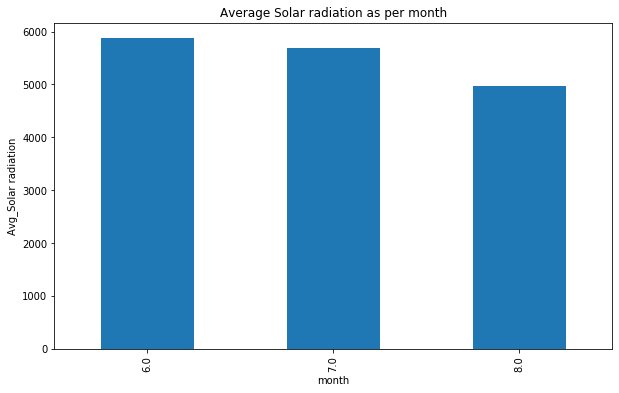

In [166]:
plt.figure(figsize=(10,6))
month["Solar radiation"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_Solar radiation')
plt.title('Average Solar radiation as per month')

Average Daily incoming solar radiation (wh/m2) decreases from June to August.

Text(0.5, 1.0, 'Average Next_Tmax as per month')

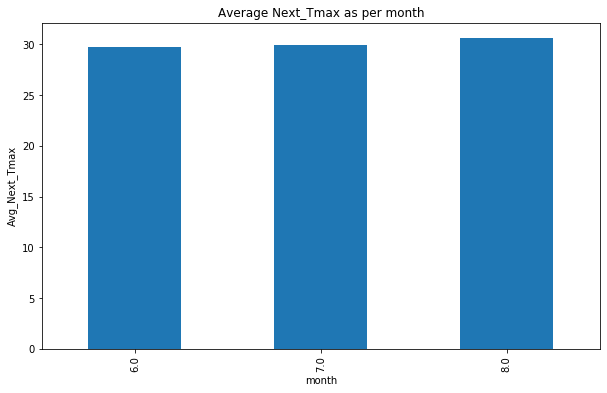

In [167]:
plt.figure(figsize=(10,6))
month["Next_Tmax"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_Next_Tmax')
plt.title('Average Next_Tmax as per month')

 The next-day avg maximum air temperature (Â°C) increases from June to August.

Text(0.5, 1.0, 'Average Next_Tmin as per month')

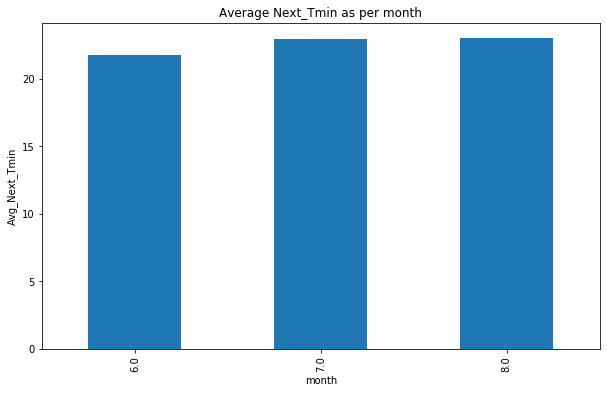

In [91]:
plt.figure(figsize=(10,6))
month["Next_Tmin"].plot.bar()
plt.xticks(rotation = 90)
plt.ylabel('Avg_Next_Tmin')
plt.title('Average Next_Tmin as per month')

 The next-day avg minimum air temperature (Â°C) increases from June to August.

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float64


Text(0.5, 1.0, 'station vs Next_Tmax - Boxplot')

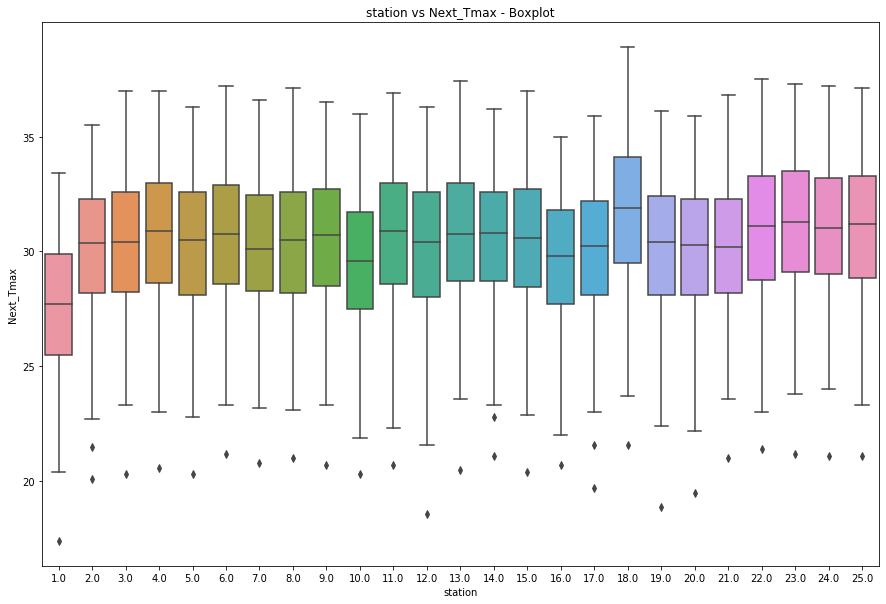

In [169]:
plt.figure(figsize=(15,10))
sns.boxplot(x="station", y="Next_Tmax",data=df)
plt.title('station vs Next_Tmax - Boxplot')

The next-day median maximum air temperature (Â°C) was lowest for station 1 and highest for station 18.

Text(0.5, 1.0, 'station vs Next_Tmin - Boxplot')

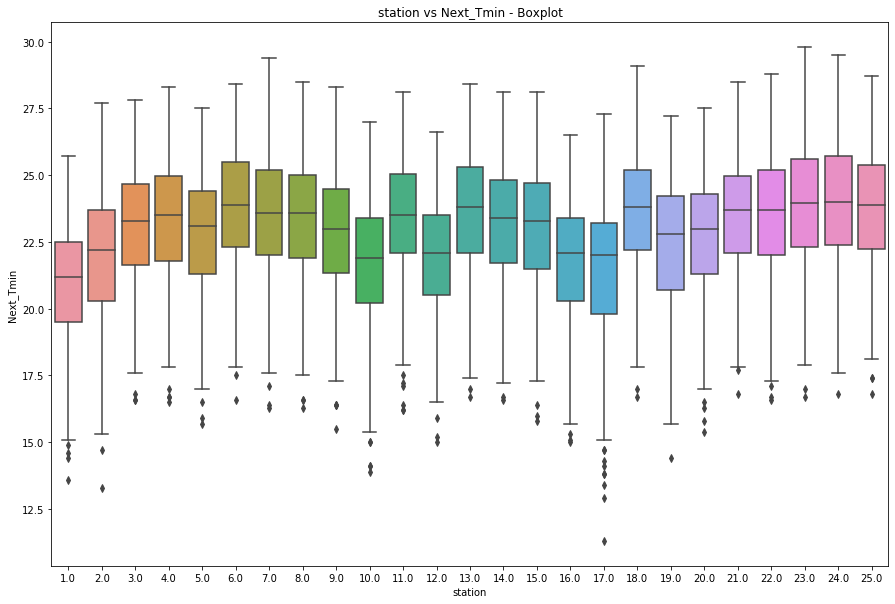

In [95]:
plt.figure(figsize=(15,10))
sns.boxplot(x="station", y="Next_Tmin",data=df)
plt.title('station vs Next_Tmin - Boxplot')

The next-day median minimum air temperature (Â°C) was lowest for station 1 and highest for station 23 & 24.

Text(0.5, 1.0, 'latitude vs Next_Tmax - Boxplot')

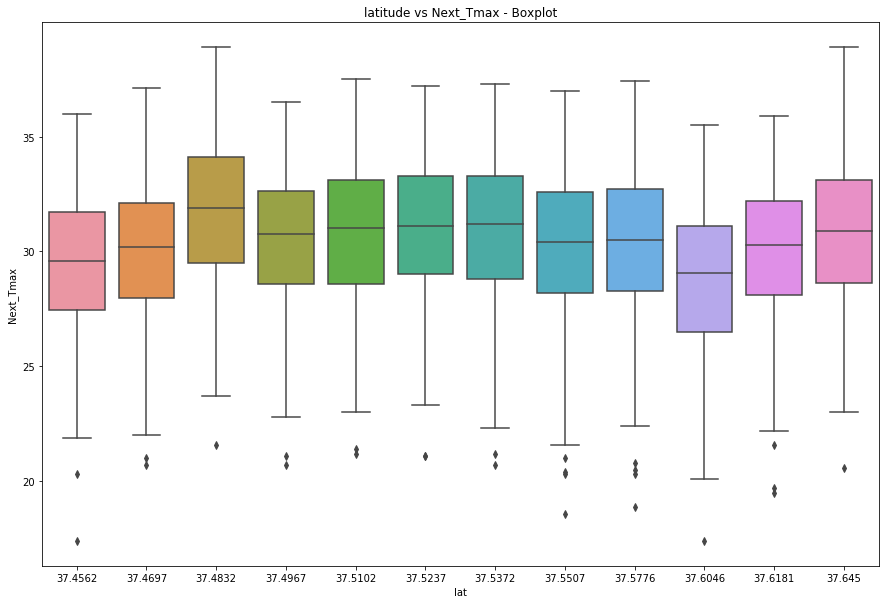

In [170]:
plt.figure(figsize=(15,10))
sns.boxplot(x="lat", y="Next_Tmax",data=df)
plt.title('latitude vs Next_Tmax - Boxplot')

The next-day median maximum air temperature (Â°C) was highest for latitude 37.4832

Text(0.5, 1.0, 'latitude vs Next_Tmin - Boxplot')

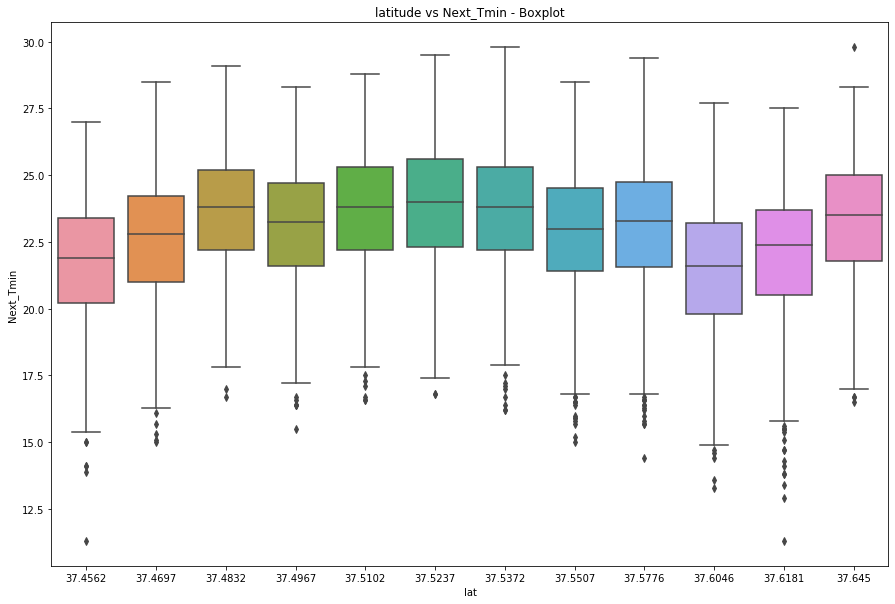

In [171]:
plt.figure(figsize=(15,10))
sns.boxplot(x="lat", y="Next_Tmin",data=df)
plt.title('latitude vs Next_Tmin - Boxplot')

The next-day median minimum air temperature (Â°C) was lowest for latitude 37.4562 & 37.6046

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

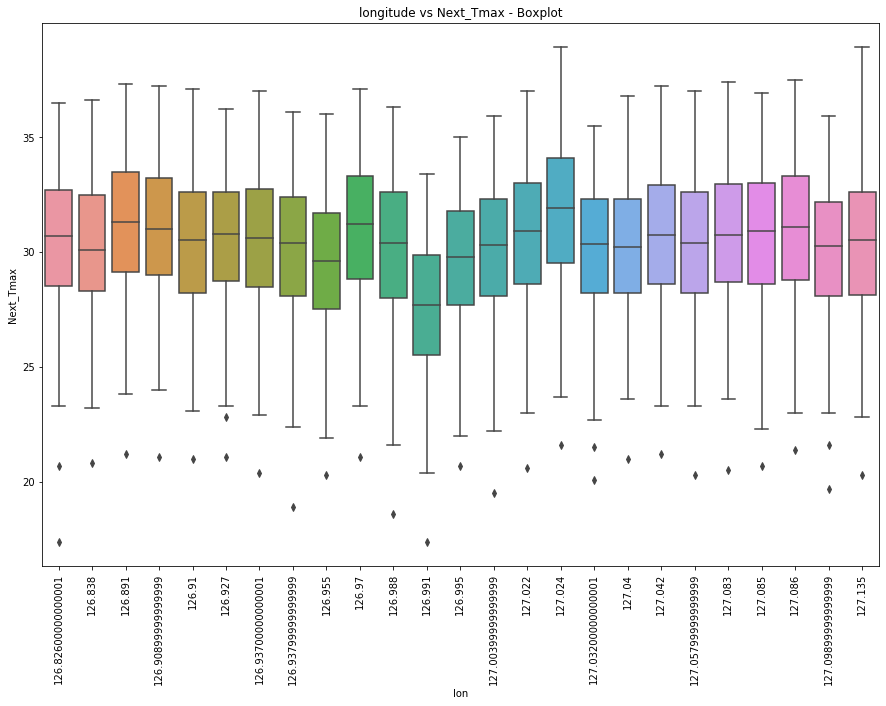

In [103]:
plt.figure(figsize=(15,10))
sns.boxplot(x="lon", y="Next_Tmax",data=df)
plt.title('longitude vs Next_Tmax - Boxplot')
plt.xticks(rotation=90)

The next-day median maximum air temperature (Â°C) was lowest for longitude 126.991

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

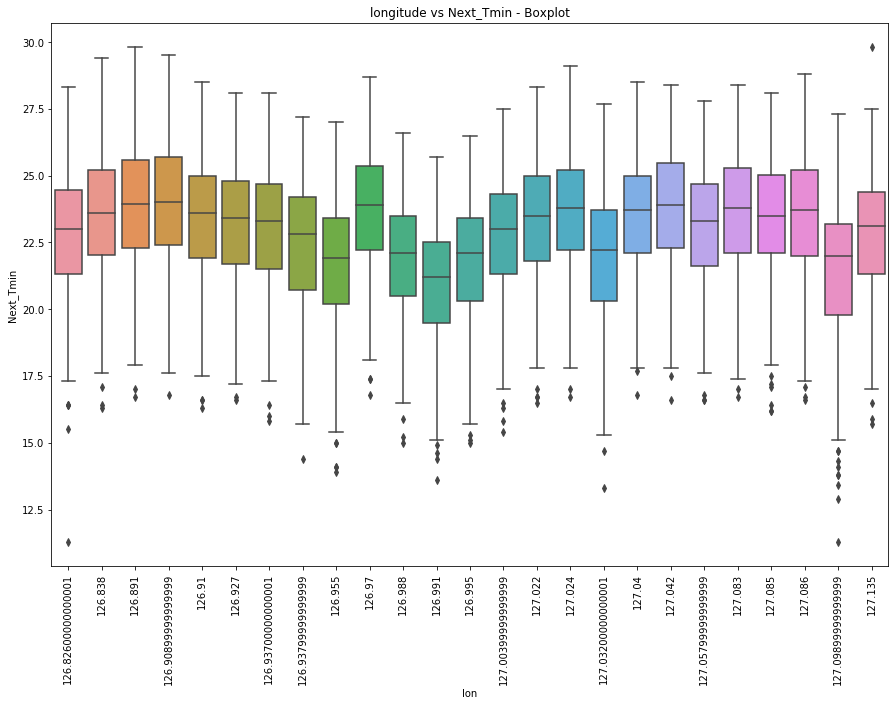

In [172]:
plt.figure(figsize=(15,10))
sns.boxplot(x="lon", y="Next_Tmin",data=df)
plt.title('longitude vs Next_Tmin - Boxplot')
plt.xticks(rotation=90)

The next-day median miniimum air temperature (Â°C) was lowest for longitude 126.991

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

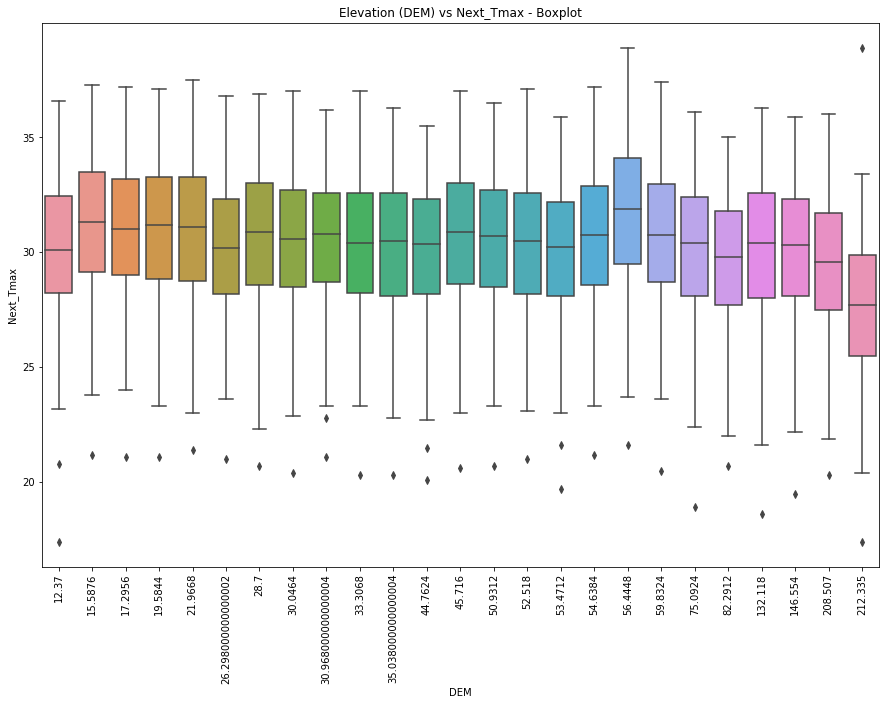

In [105]:
plt.figure(figsize=(15,10))
sns.boxplot(x="DEM", y="Next_Tmax",data=df)
plt.title('Elevation (DEM) vs Next_Tmax - Boxplot')
plt.xticks(rotation=90)

The next-day median maximum air temperature (Â°C) was lowest for station having DEM (Elevation) 212.335

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

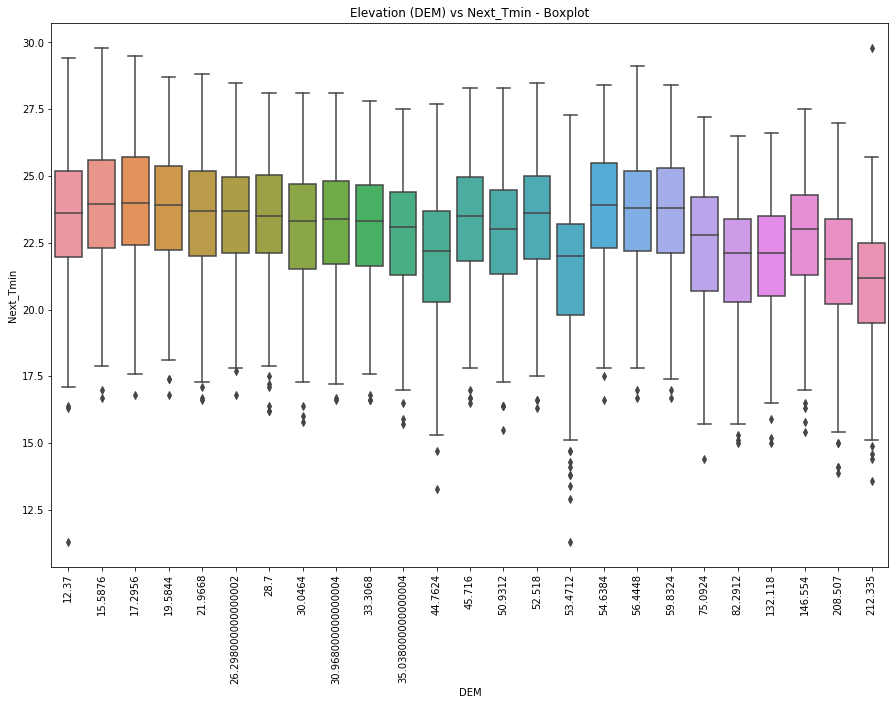

In [173]:
plt.figure(figsize=(15,10))
sns.boxplot(x="DEM", y="Next_Tmin",data=df)
plt.title('Elevation (DEM) vs Next_Tmin - Boxplot')
plt.xticks(rotation=90)

The next-day median minimum air temperature (Â°C) was lowest for station having DEM (Elevation) 212.335

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

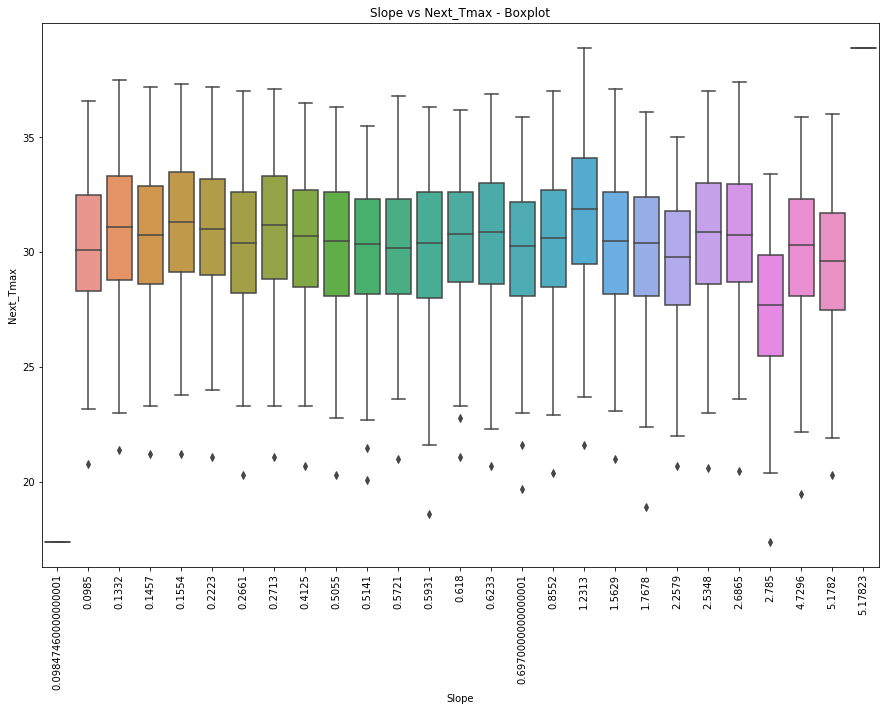

In [107]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Slope", y="Next_Tmax",data=df)
plt.title('Slope vs Next_Tmax - Boxplot')
plt.xticks(rotation=90)

The next-day median maximum air temperature (Â°C) was lowest for station having slope 2.785

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

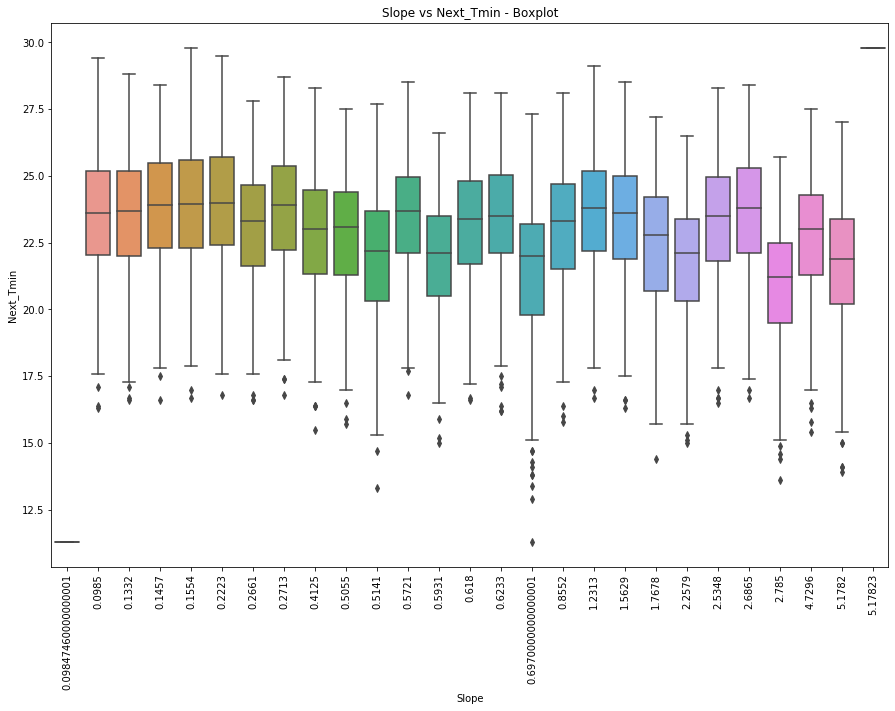

In [108]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Slope", y="Next_Tmin",data=df)
plt.title('Slope vs Next_Tmin - Boxplot')
plt.xticks(rotation=90)

The next-day median minimum air temperature (Â°C) was lowest for station having slope 2.785

Let's look at the correlation matrix of the dataset for continuous features

In [175]:
dfcor = df.corr()
dfcor

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month
station,1.000000e+00,0.113211,0.132419,-0.067122,-0.168010,0.069561,0.105422,0.005320,-0.134226,0.006956,...,-0.010580,-2.376097e-01,-1.187626e-01,-2.559703e-01,-9.011266e-02,-0.019011,0.108306,0.128719,0.000000e+00,-6.892924e-19
Present_Tmax,1.132114e-01,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,...,-0.101471,-5.277559e-02,9.074537e-03,-1.878551e-01,-1.060965e-01,-0.025557,0.613109,0.625252,6.025443e-02,1.473111e-01
Present_Tmin,1.324190e-01,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,...,-0.064394,-7.871497e-02,-4.372508e-02,-2.512571e-01,-1.467365e-01,0.053828,0.473868,0.799758,3.771596e-02,8.820983e-02
LDAPS_RHmin,-6.712167e-02,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.168595,8.752301e-02,-7.660834e-02,1.026120e-01,1.243464e-01,0.244795,-0.442958,0.095830,-2.056410e-03,-1.900426e-01
LDAPS_RHmax,-1.680105e-01,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.117853,1.967512e-01,2.579192e-02,1.780307e-01,2.206680e-01,0.149699,-0.286478,-0.072490,-1.427035e-01,-1.184928e-01
LDAPS_Tmax_lapse,6.956068e-02,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.160273,-4.229788e-02,9.110723e-02,-1.797664e-01,-1.631227e-01,0.048111,0.836144,0.591535,1.627829e-02,9.794881e-02
LDAPS_Tmin_lapse,1.054220e-01,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,-0.094655,-9.672557e-02,-2.683105e-02,-1.964069e-01,-1.867535e-01,0.160443,0.593195,0.886964,-4.723155e-03,2.352934e-02
LDAPS_WS,5.319869e-03,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.144085,3.683553e-02,-5.975570e-02,1.919832e-01,1.724642e-01,0.122116,-0.346592,-0.097390,-1.122623e-01,-1.124582e-01
LDAPS_LH,-1.342263e-01,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,0.019979,1.338695e-01,2.594779e-02,5.540187e-02,8.720337e-02,-0.047523,0.159324,-0.055895,5.744957e-02,6.629420e-02
LDAPS_CC1,6.955762e-03,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,0.091722,-8.170208e-03,-6.876147e-03,-1.415893e-02,-2.085302e-02,0.218949,-0.457583,-0.011129,-6.683323e-02,-2.105085e-01


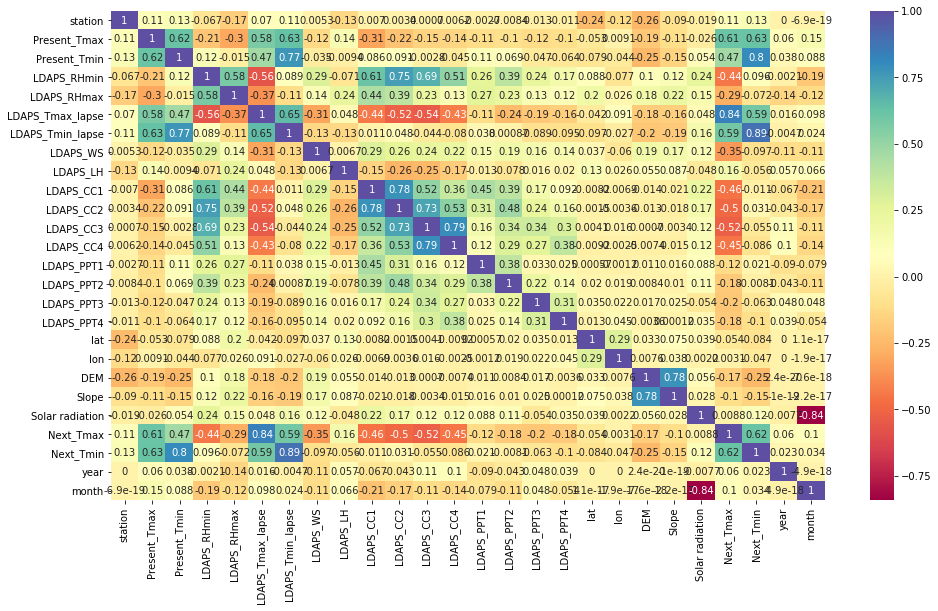

In [176]:
plt.figure(figsize=(16,9))
sns.heatmap(dfcor,cmap='Spectral',annot=True)

Next day's maximum temp is very strongly correlated with LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C) (LDAPS_Tmax_lapse), strongly correlated with Next day's minimum temperature, Present day's maximum temperature and LDAPS_Tmax_lapse. It is also moderately correlated with Present day's minimum temperature.

Next day's minimum temp is very strongly correlated with LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C) (LDAPS_Tmin_lapse) and Present day's minimum temperature, strongly correlated with Present day's maximum temperature, Next day's maximum temperature, and LDAPS_Tmax_lapse.

Let's visulaize the highest correlations for the output variables

Text(0.5, 1.0, 'LDAPS_Tmax_lapse vs Next_Tmax - Scatterplot')

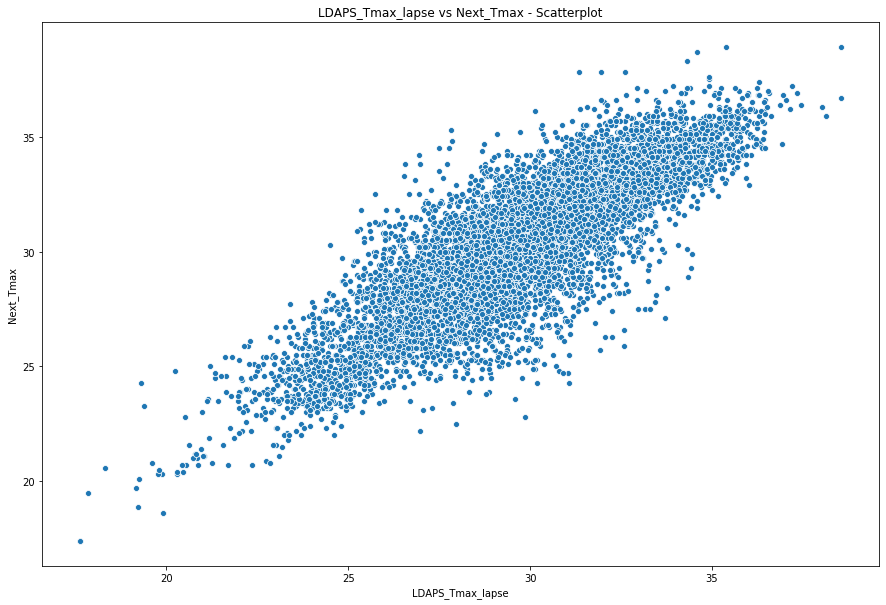

In [177]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="LDAPS_Tmax_lapse", y="Next_Tmax",data=df)
plt.title('LDAPS_Tmax_lapse vs Next_Tmax - Scatterplot')

Text(0.5, 1.0, 'LDAPS_Tmin_lapse vs Next_Tmin - Scatterplot')

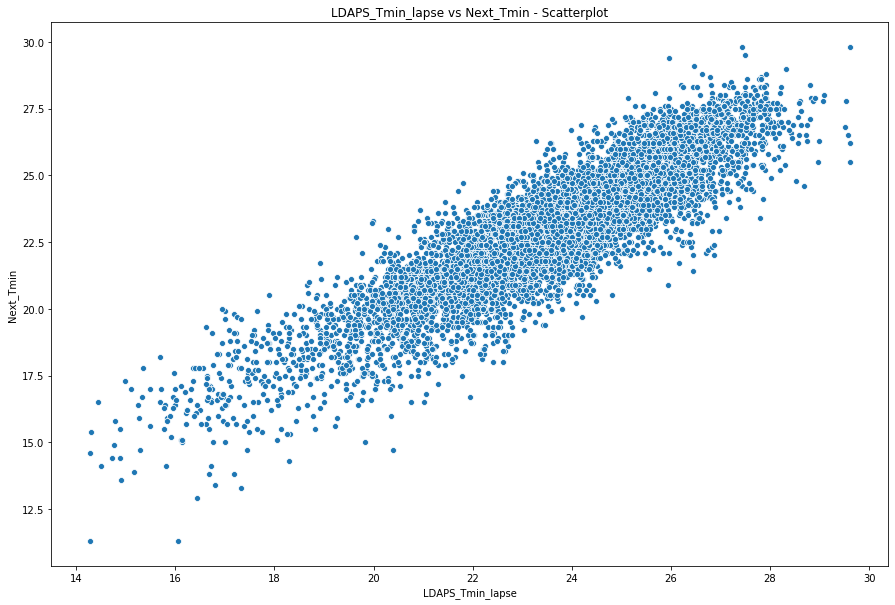

In [178]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="LDAPS_Tmin_lapse", y="Next_Tmin",data=df)
plt.title('LDAPS_Tmin_lapse vs Next_Tmin - Scatterplot')

Text(0.5, 1.0, 'Present_Tmin vs Next_Tmin - Scatterplot')

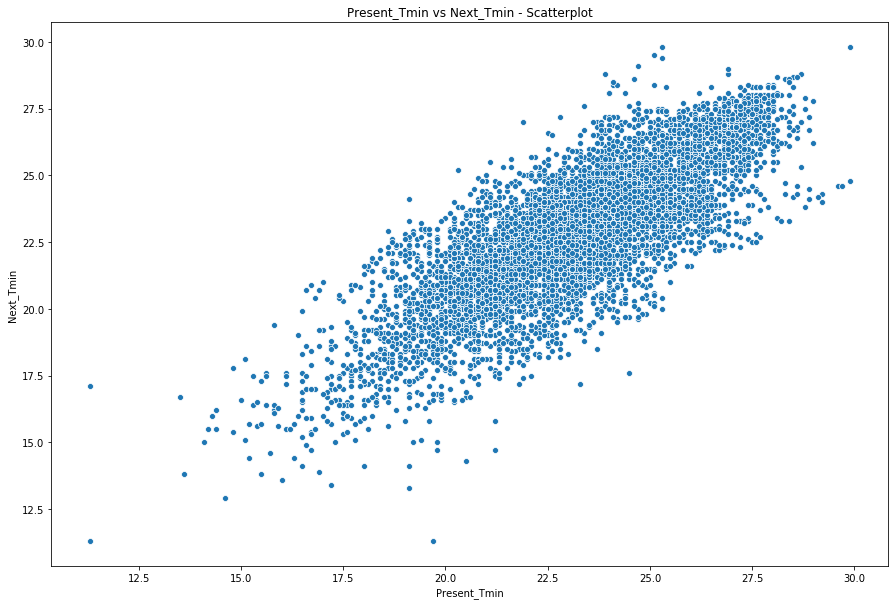

In [179]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="Present_Tmin", y="Next_Tmin",data=df)
plt.title('Present_Tmin vs Next_Tmin - Scatterplot')

In [180]:
#Let's check for presence of null values in the dataset
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
year                 2
month                2
dtype: int64

In [181]:
#dropping the null value entries
df.shape

(7752, 26)

In [182]:
df.dropna(inplace=True)
df.shape

(7588, 26)

In [183]:
#Checking skewness
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
year                0.013575
month              -0.174856
dtype: float64

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Present_Tmax      7588 non-null   float64
 2   Present_Tmin      7588 non-null   float64
 3   LDAPS_RHmin       7588 non-null   float64
 4   LDAPS_RHmax       7588 non-null   float64
 5   LDAPS_Tmax_lapse  7588 non-null   float64
 6   LDAPS_Tmin_lapse  7588 non-null   float64
 7   LDAPS_WS          7588 non-null   float64
 8   LDAPS_LH          7588 non-null   float64
 9   LDAPS_CC1         7588 non-null   float64
 10  LDAPS_CC2         7588 non-null   float64
 11  LDAPS_CC3         7588 non-null   float64
 12  LDAPS_CC4         7588 non-null   float64
 13  LDAPS_PPT1        7588 non-null   float64
 14  LDAPS_PPT2        7588 non-null   float64
 15  LDAPS_PPT3        7588 non-null   float64
 16  LDAPS_PPT4        7588 non-null   float64


In [185]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0


In [186]:
df['station'] = df.station.astype(str)
df['year'] = df.year.astype(str)
df['month'] = df.month.astype(str)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   object 
 1   Present_Tmax      7588 non-null   float64
 2   Present_Tmin      7588 non-null   float64
 3   LDAPS_RHmin       7588 non-null   float64
 4   LDAPS_RHmax       7588 non-null   float64
 5   LDAPS_Tmax_lapse  7588 non-null   float64
 6   LDAPS_Tmin_lapse  7588 non-null   float64
 7   LDAPS_WS          7588 non-null   float64
 8   LDAPS_LH          7588 non-null   float64
 9   LDAPS_CC1         7588 non-null   float64
 10  LDAPS_CC2         7588 non-null   float64
 11  LDAPS_CC3         7588 non-null   float64
 12  LDAPS_CC4         7588 non-null   float64
 13  LDAPS_PPT1        7588 non-null   float64
 14  LDAPS_PPT2        7588 non-null   float64
 15  LDAPS_PPT3        7588 non-null   float64
 16  LDAPS_PPT4        7588 non-null   float64


In [188]:
cat = pd.get_dummies(df)
cat

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,station_8.0,station_9.0,year_2013.0,year_2014.0,year_2015.0,year_2016.0,year_2017.0,month_6.0,month_7.0,month_8.0
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0,0,1,0,0,0,0,1,0,0
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0,0,1,0,0,0,0,1,0,0
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0,0,1,0,0,0,0,1,0,0
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0,0,1,0,0,0,0,1,0,0
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,...,0,0,0,0,0,0,1,0,0,1
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,...,0,0,0,0,0,0,1,0,0,1
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,0,0,0,0,0,0,1,0,0,1
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,0,0,0,0,0,0,1,0,0,1


In [189]:
cat.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'station_1.0',
       'station_10.0', 'station_11.0', 'station_12.0', 'station_13.0',
       'station_14.0', 'station_15.0', 'station_16.0', 'station_17.0',
       'station_18.0', 'station_19.0', 'station_2.0', 'station_20.0',
       'station_21.0', 'station_22.0', 'station_23.0', 'station_24.0',
       'station_25.0', 'station_3.0', 'station_4.0', 'station_5.0',
       'station_6.0', 'station_7.0', 'station_8.0', 'station_9.0',
       'year_2013.0', 'year_2014.0', 'year_2015.0', 'year_2016.0',
       'year_2017.0', 'month_6.0', 'month_7.0', 'month_8.0'],
      dtype='object')

In [190]:
cat.shape

(7588, 56)

In [191]:
cat.drop(["station_1.0","year_2013.0","month_6.0"],axis=1,inplace=True)

In [192]:
cat.shape

(7588, 53)

In [193]:
cat.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'station_10.0',
       'station_11.0', 'station_12.0', 'station_13.0', 'station_14.0',
       'station_15.0', 'station_16.0', 'station_17.0', 'station_18.0',
       'station_19.0', 'station_2.0', 'station_20.0', 'station_21.0',
       'station_22.0', 'station_23.0', 'station_24.0', 'station_25.0',
       'station_3.0', 'station_4.0', 'station_5.0', 'station_6.0',
       'station_7.0', 'station_8.0', 'station_9.0', 'year_2014.0',
       'year_2015.0', 'year_2016.0', 'year_2017.0', 'month_7.0', 'month_8.0'],
      dtype='object')

In [194]:
X=df.drop(["Next_Tmax","Next_Tmin"], axis=1)
y1=df["Next_Tmax"]
y2=df["Next_Tmin"]

In [195]:
#Scaling

In [196]:
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

array([[-1.66460654, -0.35331763, -0.74802891, ...,  1.51056517,
        -1.41176669, -2.77335883],
       [-1.52605214,  0.72513836, -0.66472063, ...,  1.22299734,
        -1.41176669, -2.77335883],
       [-1.38749775,  0.62403311,  0.0433998 , ...,  1.20960169,
        -1.41176669, -2.77335883],
       ...,
       [ 1.38359018, -2.17321212, -2.53915704, ..., -2.09517477,
         1.42353686,  1.01021665],
       [ 1.52214457, -2.17321212, -2.28923218, ..., -2.10667071,
         1.42353686,  1.01021665],
       [ 1.66069897, -2.20691387, -2.41419461, ..., -2.07648676,
         1.42353686,  1.01021665]])

In [197]:
#PCA

In [198]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X2)
X_pca = pca.transform(X2)
print("Original shape: {}".format(str(X2.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (7588, 24)
Reduced shape: (7588, 2)


Finding the best random state

In [136]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
max_r2_score=0
for r_state in range(0,200):
    X_train,X_test,y_train,y_test = train_test_split(X2,y1, test_size=0.25,random_state=r_state)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r2_score:
        max_r2_score = r2_scr
        final_r_state = r_state
    
print("max R2 score corresponding to random state",final_r_state,"is",max_r2_score)

max R2 score corresponding to random state 30 is 0.8136281130660757


In [137]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X2,y1, test_size=0.25,random_state=30)
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2, test_size=0.25,random_state=103)

In [138]:
print(X_train1.shape,"\n",X_test1.shape,"\n",X_train2.shape,"\n",X_test2.shape)

(5691, 24) 
 (1897, 24) 
 (5691, 24) 
 (1897, 24)


Observing performance of different classifier algorithms

In [139]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [140]:
LR1 = LinearRegression()
RR1 = Ridge()#alpha=41
LSR1 = Lasso()
KNR1 = KNeighborsRegressor()
#SV1 = SVR()
DTC1 = DecisionTreeRegressor()
RFC1 = RandomForestRegressor()
ABC1 = AdaBoostRegressor()
GBC1 = GradientBoostingRegressor()
XGB1 = xgb.XGBRegressor()

In [141]:
LR2 = LinearRegression()
RR2 = Ridge()#alpha=41
LSR2 = Lasso()
KNR2 = KNeighborsRegressor()
#SV2 = SVR()
DTC2 = DecisionTreeRegressor()
RFC2 = RandomForestRegressor()
ABC2 = AdaBoostRegressor()
GBC2 = GradientBoostingRegressor()
XGB2 = xgb.XGBRegressor()

In [142]:
models1 = []
models1.append(("LinearRegression", LR1))
models1.append(("Ridge", RR1))
models1.append(("Lasso", LSR1))
models1.append(("KNeighborsRegressor", KNR1))
#models1.append(("SVR", SV1))
models1.append(("DecisionTreeRegressor", DTC1))
models1.append(("RandomForestRegressor", RFC1))
models1.append(("AdaBoostRegressor", ABC1))
models1.append(("GradientBoostingRegressor", GBC1))
models1.append(("XGBoostRegressor", XGB1))

In [143]:
models2 = []
models2.append(("LinearRegression", LR2))
models2.append(("Ridge", RR2))
models2.append(("Lasso", LSR2))
models2.append(("KNeighborsRegressor", KNR2))
#models2.append(("SVR", SV2))
models2.append(("DecisionTreeRegressor", DTC2))
models2.append(("RandomForestRegressor", RFC2))
models2.append(("AdaBoostRegressor", ABC2))
models2.append(("GradientBoostingRegressor", GBC2))
models2.append(("XGBoostRegressor", XGB2))

In [144]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf1 = KFold(n_splits=4, random_state=30, shuffle=True)

In [145]:
Model_Next_Tmax = []
score_Next_Tmax = []
cvs_Next_Tmax = []
MSE_Next_Tmax = []
MAE_Next_Tmax = []
for name,model in models1:
    print("*****************",name,"******************\n")
    Model_Next_Tmax.append(name)
    model.fit(X_train1,y_train1)
    print(model)
    pre1 = model.predict(X_test1)
    print("\n")
    R21 = r2_score(y_test1,pre1)
    print("R2 Score = ",R21)
    score_Next_Tmax.append(R21)
    print("\n")
    sc1 = cross_val_score(model,X,y1,cv=kf1,scoring="r2").mean()
    print("Cross val score = ",sc1)
    cvs_Next_Tmax.append(sc1)
    print("\n")
    mse1 = mean_squared_error(y_test1,pre1)
    print("Mean Squared error\n", mse1)
    MSE_Next_Tmax.append(mse1)
    print("\n")
    mae1 = mean_absolute_error(y_test1,pre1)
    print("Mean absolute error \n{}".format(mae1))
    MAE_Next_Tmax.append(mae1)
    print("\n\n")

***************** LinearRegression ******************

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2 Score =  0.8136281130660757


Cross val score =  0.78133928987258


Mean Squared error
 1.8595581856330716


Mean absolute error 
1.0318396991820986



***************** Ridge ******************

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


R2 Score =  0.8136228715997191


Cross val score =  0.7813541772512909


Mean Squared error
 1.859610483282833


Mean absolute error 
1.0318368092904429



***************** Lasso ******************

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


R2 Score =  0.6109171935510361


Cross val score =  0.7172323252376168


Mean Squared error
 3.8821419341951193


Mean absolute er

In [146]:
result1 = pd.DataFrame({"Model": Model_Next_Tmax, "R2 Socre": score_Next_Tmax, "Cross val score": cvs_Next_Tmax, "Mean Squared Error": MSE_Next_Tmax, "Mean Absolute Error": MAE_Next_Tmax})
result1

,Model,R2 Socre,Cross val score,Mean Squared Error,Mean Absolute Error
0,LinearRegression,0.813628,0.781339,1.859558,1.031840
1,Ridge,0.813623,0.781354,1.859610,1.031837
2,Lasso,0.610917,0.717232,3.882142,1.571921
3,KNeighborsRegressor,0.872765,0.543452,1.269510,0.849562
4,DecisionTreeRegressor,0.805794,0.771542,1.937728,1.020401
5,RandomForestRegressor,0.916948,0.903084,0.828661,0.690537
6,AdaBoostRegressor,0.767263,0.766497,2.322174,1.250908
7,GradientBoostingRegressor,0.877890,0.858170,1.218371,0.864347
8,XGBoostRegressor,0.929795,NaN,0.700486,0.645810


Clearly Random Forest Regressor provides the best generalization performance, let's find the best parameters for it

In [157]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'n_estimators': [80,100,120]
             }
grid = GridSearchCV(estimator=RFC1,param_grid=parameters)
grid.fit(X,y1)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [149]:
RFC1 = RandomForestRegressor(n_estimators=100)
RFC1.fit(X_train1,y_train1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Saving the model

In [150]:
from sklearn.externals import joblib
joblib.dump(RFC1,'Predict_Next_Tmax.pkl')

['Predict_Next_Tmax.pkl']

In [151]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf2 = KFold(n_splits=4, random_state=103, shuffle=True)

In [155]:
Model_Next_Tmin = []
score_Next_Tmin = []
cvs_Next_Tmin = []
MSE_Next_Tmin = []
MAE_Next_Tmin = []
for name,model in models2:
    print("*****************",name,"******************\n")
    Model_Next_Tmin.append(name)
    model.fit(X_train2,y_train2)
    print(model)
    pre2 = model.predict(X_test2)
    print("\n")
    R22 = r2_score(y_test2,pre2)
    print("R2 Score = ",R22)
    score_Next_Tmin.append(R22)
    print("\n")
    sc2 = cross_val_score(model,X,y2,cv=kf2,scoring="r2").mean()
    print("Cross val score = ",sc2)
    cvs_Next_Tmin.append(sc2)
    print("\n")
    mse2 = mean_squared_error(y_test2,pre2)
    print("Mean Squared error\n", mse2)
    MSE_Next_Tmin.append(mse2)
    print("\n")
    mae2 = mean_absolute_error(y_test2,pre2)
    print("Mean absolute error \n{}".format(mae2))
    MAE_Next_Tmin.append(mae2)
    print("\n\n")

***************** LinearRegression ******************

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2 Score =  0.8572163088548901


Cross val score =  0.8345910197552602


Mean Squared error
 0.9126448769637975


Mean absolute error 
0.7432243835663118



***************** Ridge ******************

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


R2 Score =  0.8572070675461156


Cross val score =  0.8346035609602218


Mean Squared error
 0.912703945566393


Mean absolute error 
0.74325196357325



***************** Lasso ******************

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


R2 Score =  0.6397594395016223


Cross val score =  0.7856430489267254


Mean Squared error
 2.302585816185991


Mean absolute err

In [156]:
result2 = pd.DataFrame({"Model": Model_Next_Tmin, "R2 Socre": score_Next_Tmin, "Cross val score": cvs_Next_Tmin, "Mean Squared Error": MSE_Next_Tmin, "Mean Absolute Error": MAE_Next_Tmin})
result2

,Model,R2 Socre,Cross val score,Mean Squared Error,Mean Absolute Error
0,LinearRegression,0.857216,0.834591,0.912645,0.743224
1,Ridge,0.857207,0.834604,0.912704,0.743252
2,Lasso,0.639759,0.785643,2.302586,1.205925
3,KNeighborsRegressor,0.874869,0.521388,0.799810,0.672219
4,DecisionTreeRegressor,0.808188,0.793634,1.226025,0.808803
5,RandomForestRegressor,0.919083,0.904925,0.517207,0.544749
6,AdaBoostRegressor,0.825974,0.812154,1.112338,0.847124
7,GradientBoostingRegressor,0.903012,0.885867,0.619929,0.615445
8,XGBoostRegressor,0.940247,NaN,0.381926,0.471935


In [158]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'n_estimators': [80,100,120]
             }
grid = GridSearchCV(estimator=RFC2,param_grid=parameters)
grid.fit(X,y2)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [159]:
RFC2 = RandomForestRegressor(n_estimators=80)
RFC2.fit(X_train2,y_train2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [160]:
from sklearn.externals import joblib
joblib.dump(RFC2,'Predict_Next_Tmin.pkl')

['Predict_Next_Tmin.pkl']